# Analysis and visualizations of the Henley & Partners passport ranking

Henley & Partners is a company that provides consultancy and assistance for obtaining residency and citizenship through investment in various countries.
The Henley Passport Index is one of the most reliable indices currently available and is based on historical data from the International Air Transport Association (IATA)
The index is updated quarterly and covers information from 199 different countries and their access to 227 destinations.
The ranking is determined by the number of visa-free accesses a particular country has to other territories. Visas granted online or upon arrival in a country are not included in the count of visa-free accesses.

## Libraries

In [1]:
#____ data analysis ____
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

#____ data visualization ____
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

#____ web scrapping ____
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

## Web Scrapping

### Initial exploration of Henley & Partners website

Firefox driver initialization.

In [2]:
web = 'https://www.henleyglobal.com/passport-index/ranking'

In [3]:
driver = webdriver.Firefox()

In [4]:
driver.get(web)

Remove cookies window.

In [5]:
driver.find_element(By.XPATH, '/html/body/div[8]/div/div/div/div[2]/div/div[2]/button[2]').click()

#### Scrapping of the name of countries

In [6]:
elements_countries = driver.find_elements(By.CLASS_NAME, 'navy')

In [76]:
elements_countries

[<selenium.webdriver.remote.webelement.WebElement (session="bb410d8a-6f8a-4e9e-ae2f-80ddb5e7a1f4", element="91faae88-182c-45c6-b2e8-7d1c1decda2d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="bb410d8a-6f8a-4e9e-ae2f-80ddb5e7a1f4", element="b955b8f7-e724-4f51-bfdb-bbf1aa2cd652")>,
 <selenium.webdriver.remote.webelement.WebElement (session="bb410d8a-6f8a-4e9e-ae2f-80ddb5e7a1f4", element="fa417875-f6f3-4714-819f-6c9f1009eb74")>,
 <selenium.webdriver.remote.webelement.WebElement (session="bb410d8a-6f8a-4e9e-ae2f-80ddb5e7a1f4", element="a7cb781d-a055-4085-b549-579d21a681d3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="bb410d8a-6f8a-4e9e-ae2f-80ddb5e7a1f4", element="e3ed136a-d02b-4e03-a837-3599dfbacfaa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="bb410d8a-6f8a-4e9e-ae2f-80ddb5e7a1f4", element="659de49a-40c3-4230-bf5c-35305f337c52")>,
 <selenium.webdriver.remote.webelement.WebElement (session="bb410d8a-6f8a-4e9e-ae2f-80ddb5e7a1f4", element

In [7]:
countries = []
for element in elements_countries:
    countries.append(element.text)

In [8]:
countries

['Singapore',
 'Japan',
 'Germany',
 'Italy',
 'South Korea',
 'Spain',
 'Austria',
 'Finland',
 'Luxembourg',
 'Sweden',
 'Denmark',
 'France',
 'Ireland',
 'Netherlands',
 'United Kingdom',
 'Belgium',
 'Czech Republic',
 'New Zealand',
 'Norway',
 'Portugal',
 'Switzerland',
 'Australia',
 'Malta',
 'Canada',
 'Greece',
 'Hungary',
 'Poland',
 'United States',
 'Lithuania',
 'Slovakia',
 'Latvia',
 'Slovenia',
 'Estonia',
 'Iceland',
 'Liechtenstein',
 'Malaysia',
 'Cyprus',
 'United Arab Emirates',
 'Bulgaria',
 'Monaco',
 'Romania',
 'Chile',
 'Croatia',
 'Hong Kong (SAR China)',
 'Argentina',
 'San Marino',
 'Andorra',
 'Brazil',
 'Brunei',
 'Barbados',
 'Mexico',
 'Israel',
 'Bahamas',
 'St. Kitts and Nevis',
 'Seychelles',
 'Vatican City',
 'Uruguay',
 'St. Vincent and the Grenadines',
 'Antigua and Barbuda',
 'Costa Rica',
 'Trinidad and Tobago',
 'Mauritius',
 'Taiwan (Chinese Taipei)',
 'Grenada',
 'Macao (SAR China)',
 'St. Lucia',
 'Panama',
 'Ukraine',
 'Dominica',
 'Para

#### Scrapping of ranking and number of accesses for each country

In [9]:
elements_rank = driver.find_elements(By.CLASS_NAME, 'col-rank')

In [10]:
rank = []
for element in elements_rank:
    rank.append(element.text)

In [11]:
rank

['RANK',
 'ACCESS',
 '1',
 '194',
 '2',
 '192',
 '3',
 '191',
 '3',
 '191',
 '3',
 '191',
 '3',
 '191',
 '4',
 '190',
 '4',
 '190',
 '4',
 '190',
 '4',
 '190',
 '5',
 '189',
 '5',
 '189',
 '5',
 '189',
 '5',
 '189',
 '5',
 '189',
 '6',
 '188',
 '6',
 '188',
 '6',
 '188',
 '6',
 '188',
 '6',
 '188',
 '6',
 '188',
 '7',
 '187',
 '7',
 '187',
 '8',
 '186',
 '8',
 '186',
 '8',
 '186',
 '8',
 '186',
 '9',
 '185',
 '10',
 '184',
 '10',
 '184',
 '11',
 '183',
 '11',
 '183',
 '12',
 '182',
 '12',
 '182',
 '13',
 '180',
 '13',
 '180',
 '14',
 '179',
 '15',
 '178',
 '16',
 '176',
 '16',
 '176',
 '16',
 '176',
 '17',
 '175',
 '17',
 '175',
 '18',
 '171',
 '19',
 '170',
 '19',
 '170',
 '20',
 '169',
 '20',
 '169',
 '21',
 '167',
 '22',
 '162',
 '23',
 '160',
 '24',
 '159',
 '25',
 '155',
 '25',
 '155',
 '26',
 '154',
 '26',
 '154',
 '27',
 '153',
 '28',
 '151',
 '29',
 '150',
 '29',
 '150',
 '30',
 '149',
 '31',
 '147',
 '32',
 '146',
 '33',
 '145',
 '33',
 '145',
 '33',
 '145',
 '34',
 '144',
 '3

Separation between ranking and number of accesses.

In [12]:
rank = rank[2:]

In [13]:
ranking = rank[::2] #even indexes
access = rank[1::2] #odd indexes

In [14]:
ranking.remove('RANK')
access.remove('ACCESS')

Integrity check: qty of ranking = qty of accesses = qty of countries

In [15]:
print(len(ranking))
print(len(access))
print(len(countries))

199
199
199


#### Scrapping of available years at the website

In [16]:
button_years = driver.find_element(By.XPATH, '//*[contains(@id, "CountryDropDown") and contains(@id, "button")]')

In [17]:
button_years.click() #open dropdown

In [18]:
elements_year = driver.find_elements(By.XPATH, '//*[contains(@id, "ui-id-")]')

In [19]:
for element in elements_year:
    print(element.text)

Select year
2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006


In [20]:
elements_year = list(filter(lambda i: i.text!='' and i.text!='Select year', elements_year)) #remove menu title and blank elements that may appear.

Creation of variables years, first_year, last_year that will be useful throughout the notebook.

In [21]:
years = []
for element in elements_year:
    years.append(element.text)

In [22]:
first_year = int(min(years))
last_year = int(max(years))

In [23]:
button_years.click() #close dropdown

### Scrapping of all years and creation of the dataset

Function to get countries, ranking and accesses (based on exploration made above).
Returns a dataset for a specific year.

In [24]:
def get_ranking_by_year(year):

    df = pd.DataFrame(columns=['country','rank','access','year'])

    countries_elements = driver.find_elements(By.CLASS_NAME, 'navy')
    list_countries = []
    for country in countries_elements:
        list_countries.append(country.text)

    rank_elements = driver.find_elements(By.CLASS_NAME, 'col-rank')
    list_rank = []
    for r in rank_elements:
        list_rank.append(r.text)
    list_rank = list_rank[2:]

    list_ranking = list_rank[::2]
    list_access = list_rank[1::2]

    list_ranking.remove('RANK')
    list_access.remove('ACCESS')

    df['country'] = list_countries
    df['rank'] = list_ranking
    df['access'] = list_access
    df['year'] = year

    return df

Creation of the final blank dataset.

In [25]:
df_passport = pd.DataFrame(columns=['country','rank','access','year'])

Iteration year by year using the function created above.

In [26]:
for y in years:

    button_years = driver.find_element(By.XPATH, '//*[contains(@id, "CountryDropDown") and contains(@id, "button")]') #find years dropdown
    button_years.click() #open years dropdown

    elements_year = driver.find_elements(By.XPATH, '//*[contains(@id, "ui-id-")]') #finds items of the dropdown
    elements_year = list(filter(lambda e: e.text!= '' and e.text!='Select year', elements_year)) #filters blank values and title of dropdown

    for element in elements_year:
        if element.text == y:
            element.click()
            time.sleep(4)
            break

    df_year = get_ranking_by_year(y)
    df_passport = pd.concat([df_passport, df_year], ignore_index=True)

In [27]:
driver.close() #terminates driver

### Final dataset

In [28]:
df_passport

,country,rank,access,year
0,Singapore,1,194,2023
1,Japan,2,192,2023
2,Germany,3,191,2023
3,Italy,3,191,2023
4,South Korea,3,191,2023
...,...,...,...,...
3547,Iraq,81,15,2006
3548,Myanmar,81,15,2006
3549,Somalia,81,15,2006
3550,Iran,82,14,2006


In [29]:
df_passport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  3552 non-null   object
 1   rank     3552 non-null   object
 2   access   3552 non-null   object
 3   year     3552 non-null   object
dtypes: object(4)
memory usage: 111.1+ KB


Conversion of numeric columns to int.

In [30]:
df_passport[['rank', 'access', 'year']] = df_passport[['rank', 'access', 'year']].astype('int')

df_passport copy to a backup.

In [31]:
df_passport_bkp = df_passport

## Dataset enhancement

As the Henley & Partners database only contains the country name, it was necessary to externally source a database with more information to enrich the analysis.
The DataHub platform provides a table with [UN's official data.](https://unstats.un.org/unsd/methodology/m49/overview/)

In [32]:
df_countries_metadata = pd.read_csv('https://datahub.io/core/country-codes/r/country-codes.csv')

In [33]:
df_countries_metadata.head()

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925,TW,NaN,TW,...,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1,AF,AF,AF,...,Southern Asia,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2
2,ALB,355,ALB,aa,Yes,8.0,3,AL,AB,AL,...,Southern Europe,Албания,World,Tirana,EU,.al,"sq,el",783754.0,Albania,B3
3,ALG,213,DZA,ae,Yes,12.0,4,AG,AL,DZ,...,Northern Africa,Алжир,World,Algiers,AF,.dz,ar-DZ,2589581.0,Algeria,B4
4,ASA,1-684,ASM,as,Territory of US,16.0,5,AQ,NaN,AS,...,Polynesia,Американское Самоа,World,Pago Pago,OC,.as,"en-AS,sm,to",5880801.0,American Samoa,B5


In [34]:
df_countries_metadata = df_countries_metadata[df_countries_metadata['official_name_en'].isna() == False] #remove linha NaN

Selection of columns that will be used.
Columns renamed to facilitate identification and code construction.

In [35]:
df_countries_metadata = df_countries_metadata[['official_name_en','Region Name','Sub-region Name','Intermediate Region Name','CLDR display name']]

df_countries_metadata = df_countries_metadata.rename({'Region Name':'Continent', 'Sub-region Name':'sub_region_name', 'Intermediate Region Name':'intermediate_region_name', 'CLDR display name':'CLDR_display_name'}, axis=1)

### Check of the names of countries

In [36]:
df_passport[~ df_passport['country'].isin(df_countries_metadata['CLDR_display_name'])]['country'].unique()

array(['United Kingdom', 'Czech Republic', 'United States',
       'Hong Kong (SAR China)', 'St. Kitts and Nevis',
       'St. Vincent and the Grenadines', 'Antigua and Barbuda',
       'Trinidad and Tobago', 'Taiwan (Chinese Taipei)',
       'Macao (SAR China)', 'Palau Islands', 'Bosnia and Herzegovina',
       'Russian Federation', 'Türkiye', 'eSwatini', 'The Gambia',
       'Cape Verde Islands', 'Sao Tome and Principe', "Cote d'Ivoire",
       'Comoro Islands', 'Congo (Rep.)', 'Congo (Dem. Rep.)', 'Kosovo',
       'Palestinian Territory'], dtype=object)

Manual renaming of countries from passport's dataset to match with UN's dataset.

In [37]:
df_passport.replace('United States', 'US', inplace=True)
df_passport.replace('United Kingdom', 'UK', inplace=True)
df_passport.replace('Czech Republic', 'Czechia', inplace=True)
df_passport.replace('Hong Kong (SAR China)', 'Hong Kong', inplace=True)
df_passport.replace('St. Kitts and Nevis', 'St. Kitts & Nevis', inplace=True)
df_passport.replace('St. Vincent and the Grenadines', 'St. Vincent & Grenadines', inplace=True)
df_passport.replace('Antigua and Barbuda', 'Antigua & Barbuda', inplace=True)
df_passport.replace('Trinidad and Tobago', 'Trinidad & Tobago', inplace=True)
df_passport.replace('Macao (SAR China)', 'Macau', inplace=True)
df_passport.replace('Palau Islands', 'Palau', inplace=True)
df_passport.replace('Bosnia and Herzegovina', 'Bosnia', inplace=True)
df_passport.replace('Russian Federation', 'Russia', inplace=True)
df_passport.replace('Türkiye', 'Turkey', inplace=True)
df_passport.replace('eSwatini', 'Eswatini', inplace=True)
df_passport.replace('The Gambia', 'Gambia', inplace=True)
df_passport.replace('Cape Verde Islands', 'Cape Verde', inplace=True)
df_passport.replace('Sao Tome and Principe', 'São Tomé & Príncipe', inplace=True)
df_passport.replace("Cote d'Ivoire", 'Côte d’Ivoire', inplace=True)
df_passport.replace('Comoro Islands', 'Comoros', inplace=True)
df_passport.replace('Congo (Rep.)', 'Congo - Brazzaville', inplace=True)
df_passport.replace('Congo (Dem. Rep.)', 'Congo - Kinshasa', inplace=True)
df_passport.replace('Palestinian Territory', 'Palestine', inplace=True)

### Join between both datasets

In [38]:
df_passport = df_passport.merge(df_countries_metadata, how='left', left_on = 'country', right_on = 'CLDR_display_name')

#### Check of missing countries

In [39]:
df_passport[~ df_passport['country'].isin(df_countries_metadata['CLDR_display_name'])]['country'].unique()

array(['Taiwan (Chinese Taipei)', 'Kosovo'], dtype=object)

Kosovo and Taiwan are not officially within UN's database.
Therefore, the continents and subcontinents for these territories will be based on nearby countries.

In [40]:
df_passport[df_passport['country'].isin(['Hong Kong'])].head(1)

,country,rank,access,year,official_name_en,Continent,sub_region_name,intermediate_region_name,CLDR_display_name
43,Hong Kong,18,171,2023,"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,NaN,Hong Kong


In [41]:
df_passport[df_passport['country'].isin(['Serbia'])].head(1)

,country,rank,access,year,official_name_en,Continent,sub_region_name,intermediate_region_name,CLDR_display_name
70,Serbia,37,137,2023,Serbia,Europe,Southern Europe,NaN,Serbia


In [42]:
df_passport.loc[df_passport.country == 'Kosovo', 'Continent'] = 'Europe'
df_passport.loc[df_passport.country == 'Kosovo', 'sub_region_name'] = 'Southern Europe'
df_passport.loc[df_passport.country == 'Taiwan (Chinese Taipei)', 'Continent'] = 'Asia'
df_passport.loc[df_passport.country == 'Taiwan (Chinese Taipei)', 'sub_region_name'] = 'Eastern Asia'
df_passport.loc[df_passport.country == 'Taiwan (Chinese Taipei)', 'country'] = 'Taiwan'

Redefine 'countries' variable.

In [43]:
countries = df_passport['country'].unique()

## Data handling

In this step, inconsistencies in the number of accesses with zero values will be checked.

In [44]:
df_passport[df_passport['access'] == 0][['year','country']].groupby('year').agg('count')

,country
year,
2006,2
2007,185
2008,15
2009,198
2010,10
2011,6
2012,6
2013,5
2014,5


Due to an error on the Henley & Partners website, the access number information for 2007 and 2009 came as zero for all countries.
Therefore, these years will be excluded from the final database to avoid compromising the analysis and visualizations.

In [45]:
df_passport = df_passport[(df_passport['year']!=2007) & (df_passport['year']!=2009)]

Update on the list of available years.

In [46]:
years = [int(i) for i in df_passport['year'].unique()]

There are still many countries with an access number qual to 0.
These cases will be addressed next.

In [47]:
df_passport[df_passport['access'] == 0][['year','country']].groupby('year').agg('count')

,country
year,
2006,2
2008,15
2010,10
2011,6
2012,6
2013,5
2014,5
2015,5
2016,5


### Assignment based on countries with the same ranking

In this step, a search will be performed for countries with the same ranking as those that have a zero access number for that year.

In [48]:
for year in years:
    df_year = df_passport[df_passport['year'] == year]
    df_0 = df_year[df_year['access'] == 0]
    countries_0 = df_0['country'].unique().tolist()

    for country in countries_0:
        rank_country = df_0[df_0['country'] == country]['rank'].max() #get the rank of the country in that year
        rank_country_access = df_year[df_year['rank'] == rank_country]['access'].max() #get the max access of a country with the same rank, in that year

        df_passport.loc[(df_passport.country == country) & (df_passport.year == year), 'access'] = rank_country_access

In [49]:
df_passport[df_passport['access'] == 0][['year','country']].groupby('year').agg('count')

,country
year,
2008,2
2011,1
2012,1
2013,2
2014,1
2016,2


### Accesses equal to 0 in 2008

There are two countries that have an access number equal to zero in 2008 and do not have information for the first year of the dataset (2006).
Therefore, these data will be deleted.

In [50]:
df_passport[(df_passport['country'].isin(['Congo - Kinshasa','Palestine']))]

,country,rank,access,year,official_name_en,Continent,sub_region_name,intermediate_region_name,CLDR_display_name
183,Congo - Kinshasa,101,42,2023,Democratic Republic of the Congo,Africa,Sub-Saharan Africa,Middle Africa,Congo - Kinshasa
191,Palestine,105,38,2023,State of Palestine,Asia,Western Asia,NaN,Palestine
382,Congo - Kinshasa,103,42,2022,Democratic Republic of the Congo,Africa,Sub-Saharan Africa,Middle Africa,Congo - Kinshasa
391,Palestine,106,38,2022,State of Palestine,Asia,Western Asia,NaN,Palestine
581,Congo - Kinshasa,96,43,2021,Democratic Republic of the Congo,Africa,Sub-Saharan Africa,Middle Africa,Congo - Kinshasa
589,Palestine,100,39,2021,State of Palestine,Asia,Western Asia,NaN,Palestine
778,Congo - Kinshasa,97,42,2020,Democratic Republic of the Congo,Africa,Sub-Saharan Africa,Middle Africa,Congo - Kinshasa
789,Palestine,101,38,2020,State of Palestine,Asia,Western Asia,NaN,Palestine
976,Congo - Kinshasa,97,42,2019,Democratic Republic of the Congo,Africa,Sub-Saharan Africa,Middle Africa,Congo - Kinshasa
987,Palestine,102,37,2019,State of Palestine,Asia,Western Asia,NaN,Palestine


In [51]:
df_passport[(df_passport['year'] == 2008) & (df_passport['access'] == 0)]

,country,rank,access,year,official_name_en,Continent,sub_region_name,intermediate_region_name,CLDR_display_name
3180,Congo - Kinshasa,90,0,2008,Democratic Republic of the Congo,Africa,Sub-Saharan Africa,Middle Africa,Congo - Kinshasa
3181,Palestine,97,0,2008,State of Palestine,Asia,Western Asia,NaN,Palestine


In [52]:
df_passport = df_passport[(df_passport['access']!=0) | (df_passport['year']!=2008)]

### Mean of rankings below and above

In this step, the access number for the territories that are zero will be calculated by taking the simple arithmetic mean of the access number of the country immediately above and the country immediately below in terms of ranking.

In [53]:
for year in years:
    df_year = df_passport[df_passport['year'] == year]
    df_year.reset_index(inplace=True)
    df_0 = df_year[df_year['access'] == 0]
    countries_0 = df_0['country'].unique().tolist()

    for country in countries_0:
        index_country = df_year[df_year['country'] == country].index
        access_previous = df_year.iloc[index_country-1]['access'].max()
        access_next = df_year.iloc[index_country+1]['access'].max()
        access_mean = int((access_previous+access_next)/2)
        df_passport.loc[(df_passport.country == country) & (df_passport.year == year), 'access'] = access_mean

With this last treatment step, there are no more countries with an access number equal to zero.

In [54]:
df_passport[df_passport['access'] == 0][['year','country']].groupby('year').agg('count')

,country
year,


## Visualization

Colors definition for each continent that will be used as a standard throughout the entire analysis.
Colors were defined using the tool [Coolors.](https://coolors.co/)

In [55]:
colors_continent = {'Asia':'#F5F295', 'Europe':'#44A8CD', 'Oceania':'#A4E28D', 'Americas':'#F8B77B', 'Africa':'#BA8CAB'} #continentes na ordem em que aparecem na base
colors_continent_text = {'Asia':'#B1AB44', 'Europe':'#358CAC', 'Oceania':'#527147', 'Americas':'#9E6937', 'Africa':'#BA8CAB'}

In [56]:
colors_sub_region = {'Eastern Asia':'#A29F2F', 'South-eastern Asia':'#CDC95C', 'Western Asia':'#D1D12B', 'Southern Asia':'#828247', 'Central Asia':'#57570B',
                     'Sub-Saharan Africa':'#A14282', 'Northern Africa':'#D65AAE',
                     'Western Europe':'#05729C', 'Southern Europe':'#539BB6', 'Northern Europe':'#05668B', 'Eastern Europe':'#0589BC',
                     'Northern America':'#E57C1C', 'Latin America and the Caribbean':'#E3944C',
                     'Australia and New Zealand':'#5FC838', 'Polynesia':'#7ED55E', 'Melanesia':'#268B00', 'Micronesia':'#4DAA2B',
                     'Média':'#E5E4E2'}

Definition of the continent list to facilitate the construction of visualizations.

In [57]:
continents = list(colors_continent.keys())

### Situation in the last year

Dataset creation corresponding to the last year in the passport database.

In [58]:
df_passport_last_year = df_passport[df_passport['year'] == last_year]

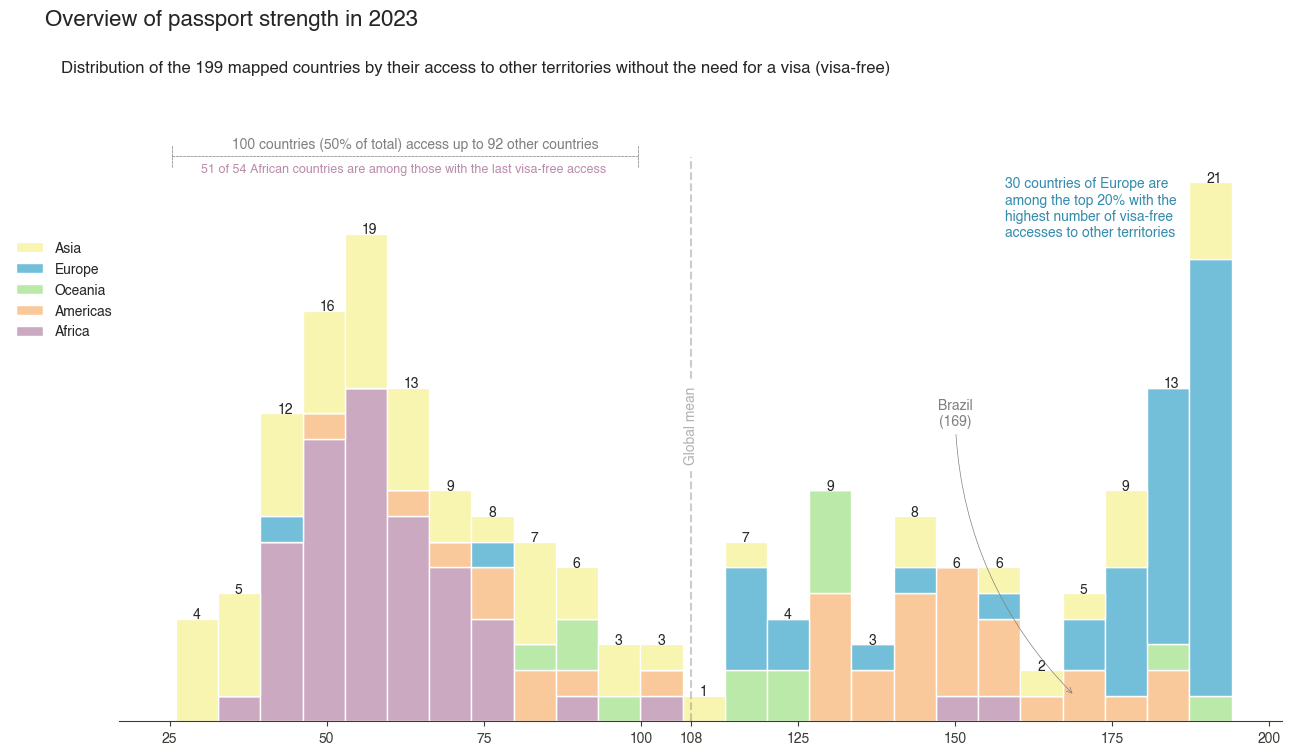

In [59]:
plt.figure(figsize=(15,8))

#________ chart style definition __________
sns.set_style('ticks', {'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})

#________ histogram __________
f = sns.histplot(data=df_passport_last_year, x='access', bins=25, multiple='stack', hue='Continent', palette=colors_continent)

#________ title definition __________
qty_countries_last_year = df_passport_last_year['country'].count()
plt.title(f'Distribution of the {qty_countries_last_year} mapped countries by their access to other territories without the need for a visa (visa-free)',fontsize=12, y=1.04, x=-0.05, loc='left')
plt.suptitle(f'Overview of passport strength in {last_year}',fontsize=16, y=1, x=0.2)

#________ annotation of histogram bars __________
dict_x = {}
for c in f.containers: #five containers, one for each continent
    for v in c:
        x = round(v.get_x(), 2)
        if x not in dict_x:
            dict_x[x] = 0
        height = v.get_height()
        prev_height = dict_x[x]
        dict_x[x] = prev_height + height

for key in dict_x:
    value = round(dict_x[key])
    width = f.containers[0][0].get_width() #get width of the first bar, first container
    f.text(key + width/2.5, value, value)

#________ Brazil annotation __________
brazil_last_year = df_passport_last_year[df_passport_last_year['country'] == 'Brazil']['access'].max()
f.annotate(f"Brazil\n({brazil_last_year})",
           size=10,  va="center", ha="center", xytext=(150, 12), textcoords='data', color='gray',
           xy=(brazil_last_year, 1), xycoords='data',
           arrowprops={'arrowstyle':'->', 'color':'gray', 'connectionstyle':'arc3,rad=0.2','linewidth':.5}
           )

#________ annotation bottom 50% __________
btm50 = round(qty_countries_last_year*0.5)
df_top_btm50 = df_passport_last_year.tail(btm50)
btm_Africa = df_top_btm50[df_top_btm50['Continent']=='Africa']['country'].count()
africa_total_last_year = df_passport_last_year[df_passport_last_year['Continent'] == 'Africa']['Continent'].count()
max_access_btm50 = df_passport_last_year['access'].tail(99).max()

style = mpatches.ArrowStyle.BarAB(widthA=.3, angleA=0, widthB=.3, angleB=0)
arrow = mpatches.FancyArrowPatch((25, 22), (btm50, 22), mutation_scale=25, arrowstyle=style, color='gray', linestyle='--', linewidth=.5)
f.add_patch(arrow)

f.annotate(f'{btm50} countries (50% of total) access up to {max_access_btm50} other countries',
           size=10,  va="center", ha="left", xycoords='data', xy=(35, 22.5), color='gray',
           )

f.annotate(f"{btm_Africa} of {africa_total_last_year} African countries are among those with the last visa-free access",
           size=9,  va="center", ha="left", xycoords='data', xy=(30, 21.5), color=colors_continent_text['Africa'],
           )

#________ Europe annotation __________
pct20 = round(qty_countries_last_year*0.2) #countries at top 20%
df_top_pct20 = df_passport_last_year.head(pct20)
pct20_Europe = df_top_pct20[df_top_pct20['Continent']=='Europe']['country'].count()

f.annotate(f'{pct20_Europe} countries of Europe are \namong the top 20% with the \nhighest number of visa-free \naccesses to other territories',
           size=10,  va="center", ha="left", xycoords='data', xy=(158, 20), color=colors_continent_text['Europe'],
           )

#________ global mean annotation __________
global_mean = df_passport_last_year['access'].mean()
plt.plot([int(global_mean), int(global_mean)], [0, 22], linestyle="--", color='gray', alpha=0.4)

f.text(
    x=int(global_mean),
    y=10,
    s='Global mean',
    horizontalalignment='center',
    verticalalignment='bottom',
    size=10,
    color='gray',
    rotation='vertical',
    backgroundcolor='white',
    alpha=0.6
)

x_ticks = np.append(f.get_xticks(), int(global_mean))
f.set_xticks(x_ticks)

#________ axis configuration __________
plt.ylim(0,24)
plt.xlim(17,202)

f.set_xlabel('')
f.get_yaxis().set_visible(False)

f.tick_params(axis='x', colors='#3B3C36')
f.spines['bottom'].set_color('#3B3C36')

#________ move legend and remove margins __________
sns.move_legend(f, 'upper left', title=None, frameon=False, bbox_to_anchor=(-.1, .8))
sns.despine(left=True)

plt.show()

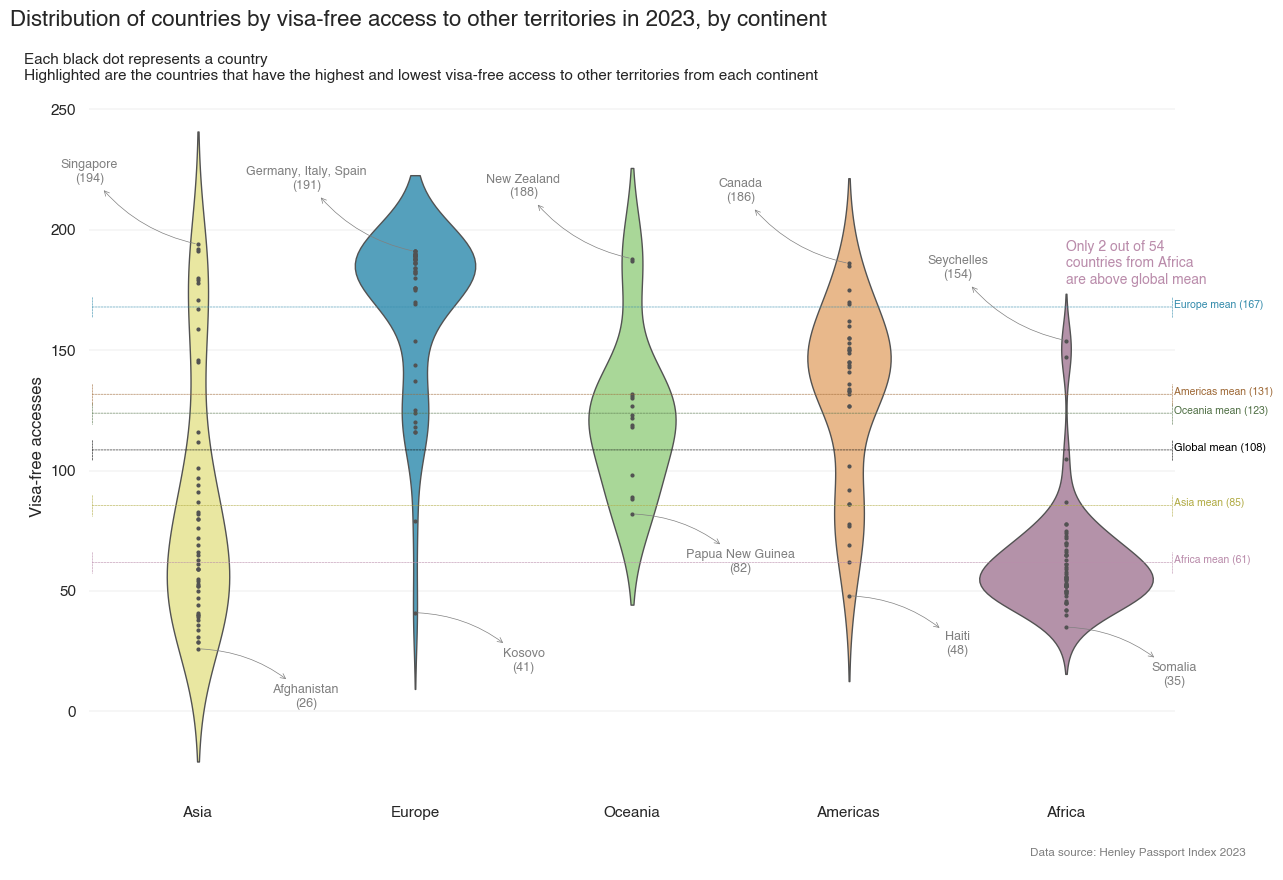

In [60]:
plt.figure(figsize=(14,9))

#________ chart style definition __________
sns.set_style('whitegrid', {"grid.color": "gray" , 'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})
sns.set_context("notebook", rc={"grid.linewidth": 0.1})

#________ violin plot __________
f = sns.violinplot(data=df_passport_last_year, x='Continent', y='access', inner='points', linewidth=1, palette=colors_continent)

#________ axis and title definition __________
plt.title('Each black dot represents a country \nHighlighted are the countries that have the highest and lowest visa-free access to other territories from each continent',fontsize=11, y=1.017, x=-0.06, loc='left')
plt.suptitle(f'Distribution of countries by visa-free access to other territories in {last_year}, by continent',fontsize=16, y=0.98, x=0.36)
f.set_xlabel('')
f.set_ylabel('Visa-free accesses')

#________ global mean annotation __________
#global_mean defined before
style = mpatches.ArrowStyle.BarAB(widthA=.3, angleA=0, widthB=.3, angleB=0)
arrow = mpatches.FancyArrowPatch((-0.5, global_mean), (4.5, global_mean), mutation_scale=25, arrowstyle=style, color='black', linestyle='--', linewidth=.4)
f.add_patch(arrow)

f.annotate(f'Global mean ({int(global_mean)})',
           size=8,  va="center", ha="left", xycoords='data', xy=(4.5, global_mean+1), color='black',
           )

#________ Africa annotation __________
f.annotate("Only 2 out of 54 \ncountries from Africa \nare above global mean",
           size=10,  va="center", ha="left", xycoords='data', xy=(4, 186), color=colors_continent['Africa']
           )

#________ annotation for countries and continents mean __________
continent_xindex = 0 #continents in the order they appear in the dataset
for continent in continents:

    #________ continents mean __________
    continent_mean = df_passport_last_year[df_passport_last_year['Continent']==continent]['access'].mean()

    style = mpatches.ArrowStyle.BarAB(widthA=.3, angleA=0, widthB=.3, angleB=0)
    arrow = mpatches.FancyArrowPatch((-0.5, continent_mean), (4.5, continent_mean), mutation_scale=25, arrowstyle=style, color=colors_continent_text[continent], linestyle='--', linewidth=.4)
    f.add_patch(arrow)

    f.annotate(f'{continent} mean ({int(continent_mean)})',
               size=7.5,  va="center", ha="left", xycoords='data', xy=(4.5, continent_mean+1), color=colors_continent_text[continent],
               )

    #________ countries with the highest and lowest number of accesses from each continent __________
    high = df_passport_last_year[df_passport_last_year['Continent'] == continent]['access'].max()
    country_high = df_passport_last_year[(df_passport_last_year['access'] == high) & (df_passport_last_year['Continent'] == continent)]['country'].tolist()
    country_high = ', '.join(country_high)

    least = df_passport_last_year[df_passport_last_year['Continent'] == continent]['access'].min()
    country_least = df_passport_last_year[(df_passport_last_year['access'] == least) & (df_passport_last_year['Continent'] == continent)]['country'].tolist()
    country_least = ', '.join(country_least)

    dict_access = {country_high:high, country_least:least}

    for iteration, country in enumerate(dict_access.keys()):
        access = dict_access[country]

        if iteration % 2 != 0:
            pos_access = access-20
            side += 1
        else:
            pos_access = access+30
            side = continent_xindex

        f.annotate(f'{country}\n({access})',
                   size=9,  va='center', ha='center', xytext=(side-0.5, pos_access), textcoords='data', color='gray',
                   xy=(continent_xindex, access), xycoords='data',
                   arrowprops={'arrowstyle':'<-', 'color':'gray', 'connectionstyle':'arc3,rad=0.2','linewidth':.5}
                   )
    continent_xindex += 1

#________ source annotation __________
f.annotate(f'Data source: Henley Passport Index {last_year}',
           size=8.4,  va="center", ha="right", xycoords='figure fraction', xy=(0.89, 0.03), color='gray'
           )

#________ margins removal __________
sns.despine(bottom=True, left=True)

plt.savefig('distri_passport.png', dpi=300)
plt.show()

#### Test with other visualizations

In [61]:
for continent in continents:
    mean = df_passport_last_year[df_passport_last_year['Continent'] == continent]['access'].mean()
    perc_mean = mean/227 * 100

    maxi = df_passport_last_year[df_passport_last_year['Continent'] == continent]['access'].max()
    perc_max = maxi/227 * 100
    country_max = df_passport_last_year[(df_passport_last_year['access'] == maxi) & (df_passport_last_year['Continent'] == continent)]['country'].tolist()
    country_max = ', '.join(country_max)

    mini = df_passport_last_year[df_passport_last_year['Continent'] == continent]['access'].min()
    perc_mini = mini/227 * 100
    country_mini = df_passport_last_year[(df_passport_last_year['access'] == mini) & (df_passport_last_year['Continent'] == continent)]['country'].tolist()
    country_mini = ', '.join(country_mini)

    print('\033[4m' + continent + '\033[0m')
    print(f'Mean of accesses: {int(mean)} ({round(perc_mean, 1)}% of the world)')
    print(f'Most accesses: {maxi} ({round(perc_max, 1)}% of the world) - {country_max}')
    print(f'Fewest accesses: {mini} ({round(perc_mini, 1)}% of the world) - {country_mini}')
    print('')

Asia
Mean of accesses: 85 (37.7% of the world)
Most accesses: 194 (85.5% of the world) - Singapore
Fewest accesses: 26 (11.5% of the world) - Afghanistan

Europe
Mean of accesses: 167 (74.0% of the world)
Most accesses: 191 (84.1% of the world) - Germany, Italy, Spain
Fewest accesses: 41 (18.1% of the world) - Kosovo

Oceania
Mean of accesses: 123 (54.6% of the world)
Most accesses: 188 (82.8% of the world) - New Zealand
Fewest accesses: 82 (36.1% of the world) - Papua New Guinea

Americas
Mean of accesses: 131 (58.0% of the world)
Most accesses: 186 (81.9% of the world) - Canada
Fewest accesses: 48 (21.1% of the world) - Haiti

Africa
Mean of accesses: 61 (27.3% of the world)
Most accesses: 154 (67.8% of the world) - Seychelles
Fewest accesses: 35 (15.4% of the world) - Somalia



C:\Users\alexm\AppData\Local\Temp\ipykernel_26344\2700354769.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_continent = df_continent.append(row_average, ignore_index=True)
C:\Users\alexm\AppData\Local\Temp\ipykernel_26344\2700354769.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_continent = df_continent.append(row_average, ignore_index=True)
C:\Users\alexm\AppData\Local\Temp\ipykernel_26344\2700354769.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_continent = df_continent.append(row_average, ignore_index=True)
C:\Users\alexm\AppData\Local\Temp\ipykernel_26344\2700354769.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

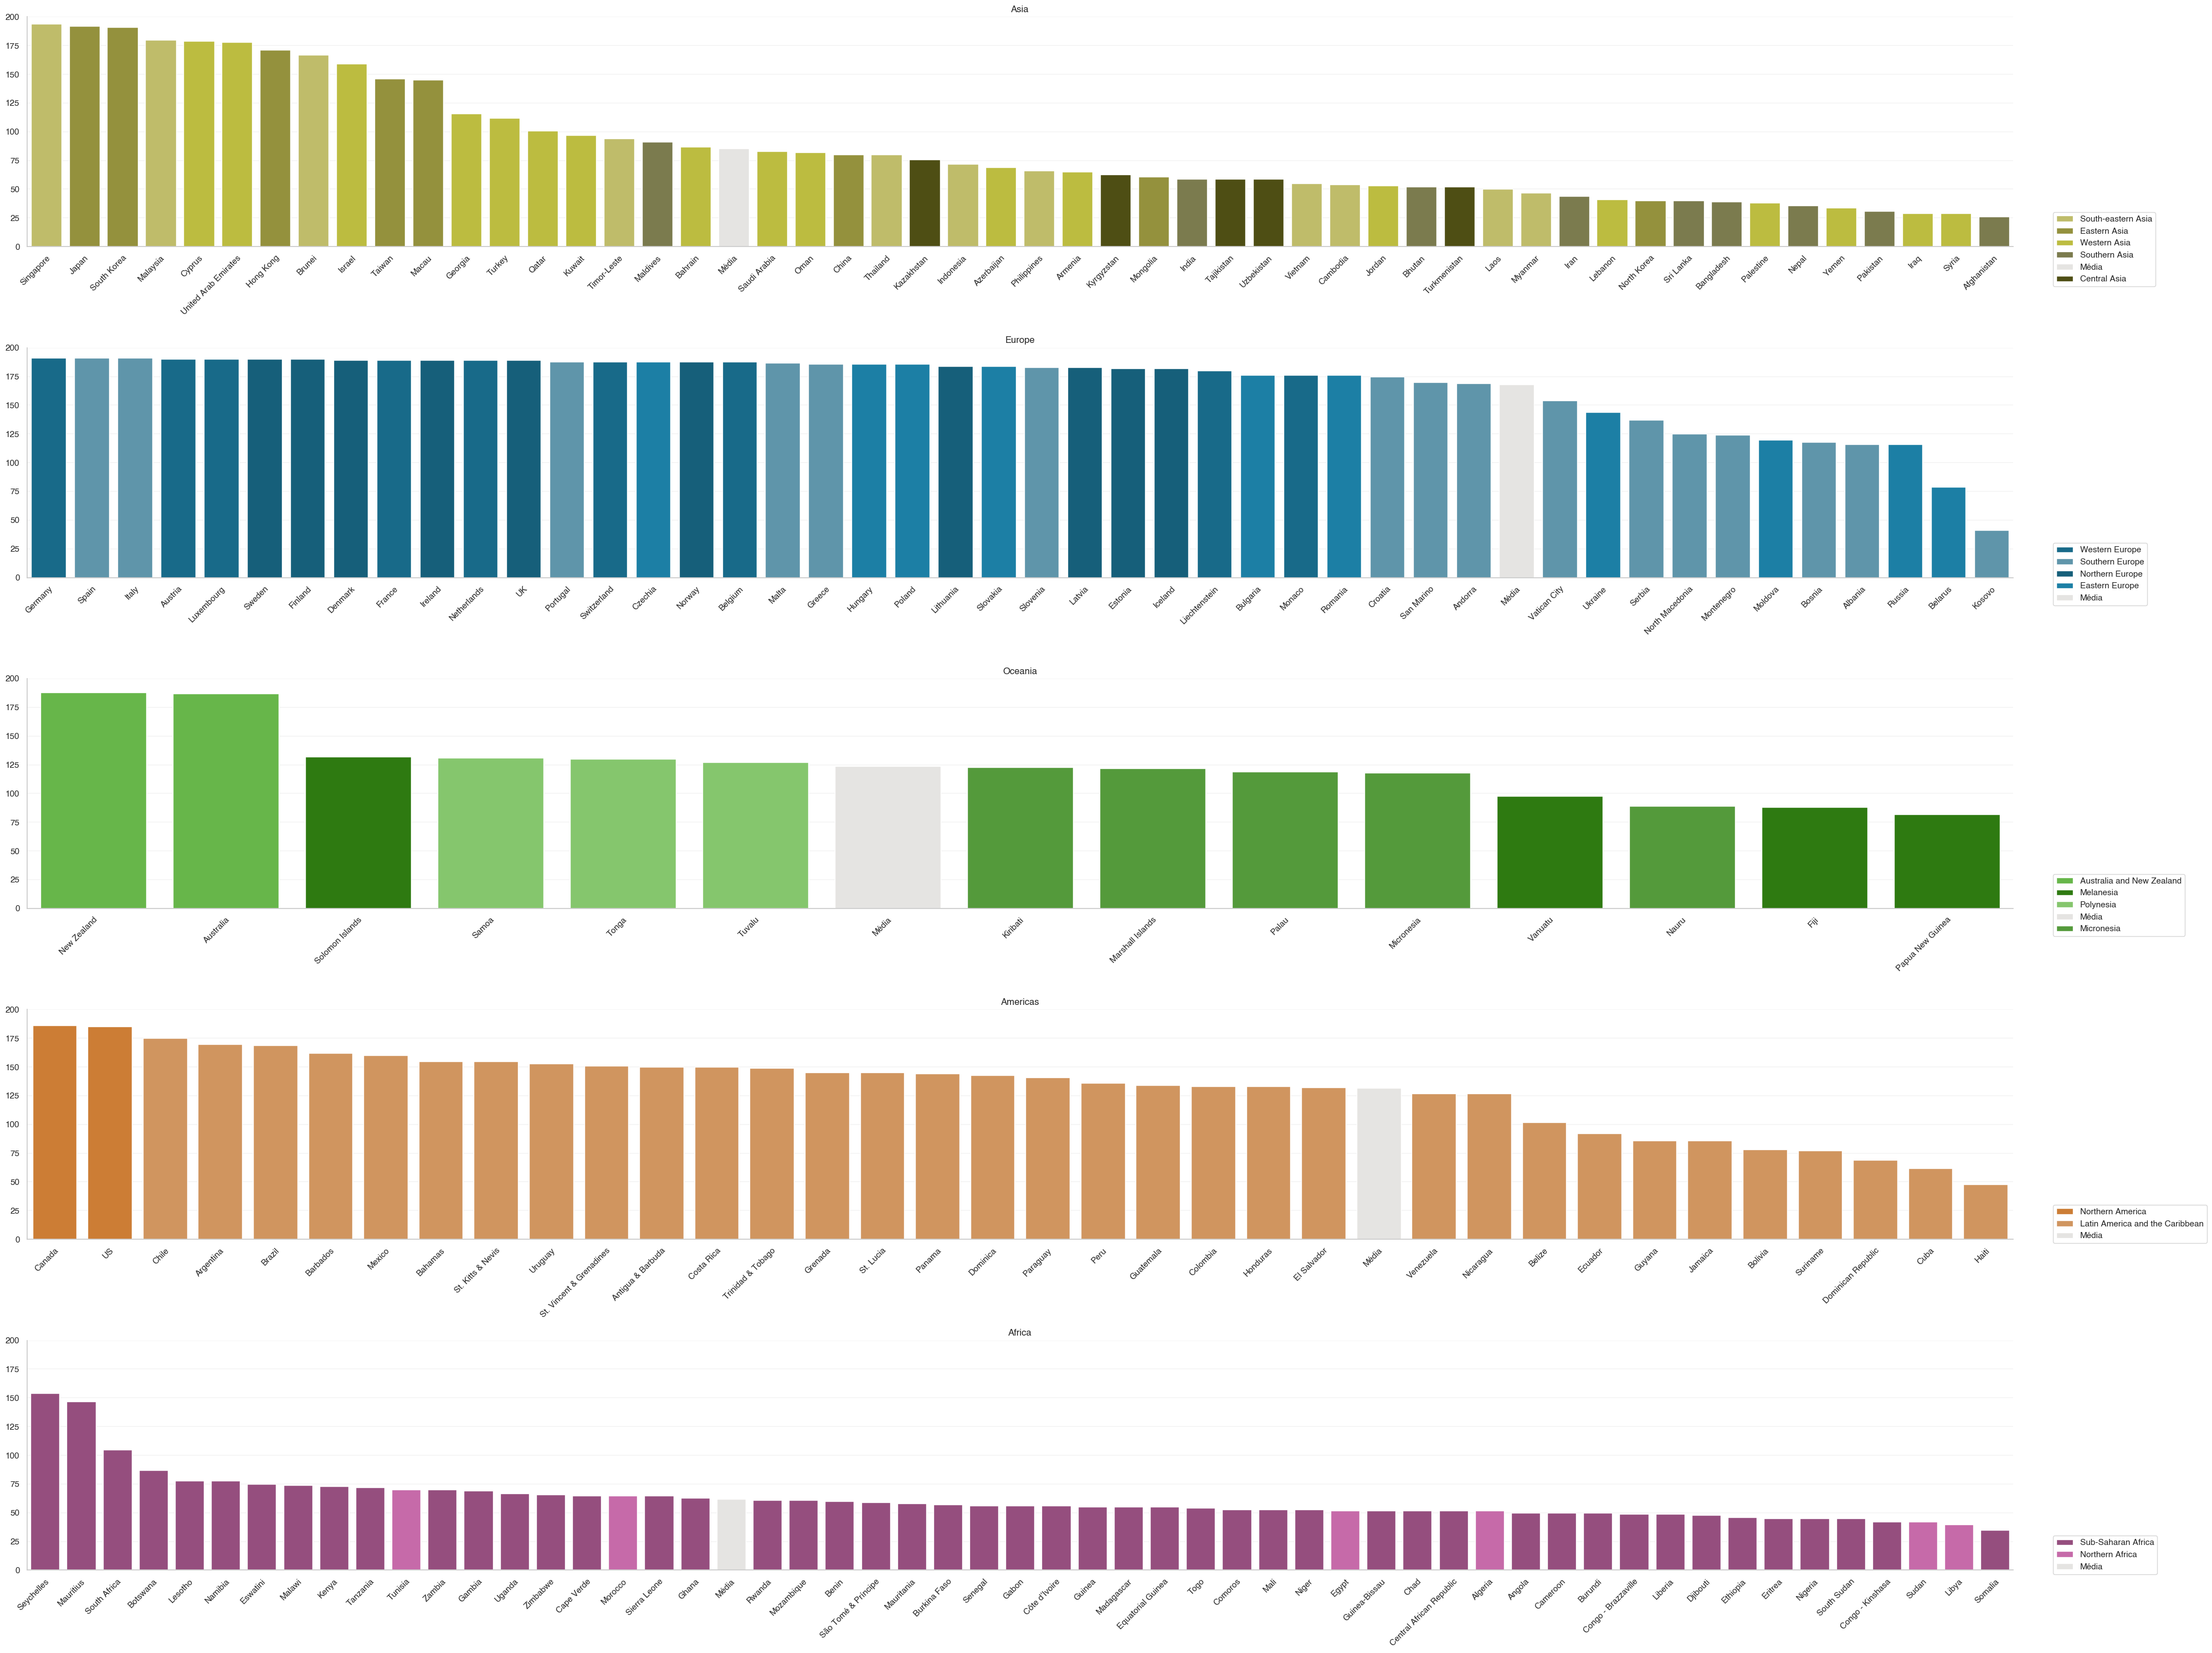

In [62]:
f, axes = plt.subplots(5,1, figsize=(40,30))

sns.set_style('whitegrid', {'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})
sns.despine()

for continent in continents:
    continent_index = continents.index(continent)
    df_continent = df_passport_last_year[df_passport_last_year['Continent'] == continent]

    media = df_passport_last_year[df_passport_last_year['Continent'] == continent]['access'].mean()
    row_average = {'country':'Média', 'access':media, 'Continent':continent, 'sub_region_name':'Média'}
    df_continent = df_continent.append(row_average, ignore_index=True)
    df_continent.sort_values('access', ascending=False, inplace=True)

    f = sns.barplot(ax=axes[continent_index], data=df_continent, x='country', y='access', hue='sub_region_name', palette=colors_sub_region, width=0.8, dodge=False)
    f.set_xticklabels(f.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
    axes[continent_index].set_title(continent)
    axes[continent_index].set_ylabel('')
    axes[continent_index].set_xlabel('')
    axes[continent_index].set(ylim=(0, 200))
    axes[continent_index].legend(bbox_to_anchor=(1.02, 0.15), borderaxespad=0)


plt.tight_layout()

plt.show()

### Analysis of the evolution over the years

Dataset adjustment for the creation of visualizations.

In [63]:
df_passport['year_str'] = df_passport['year'].astype('str')
df_passport.sort_values('year', inplace=True)

#### Evolution of the average number of accesses

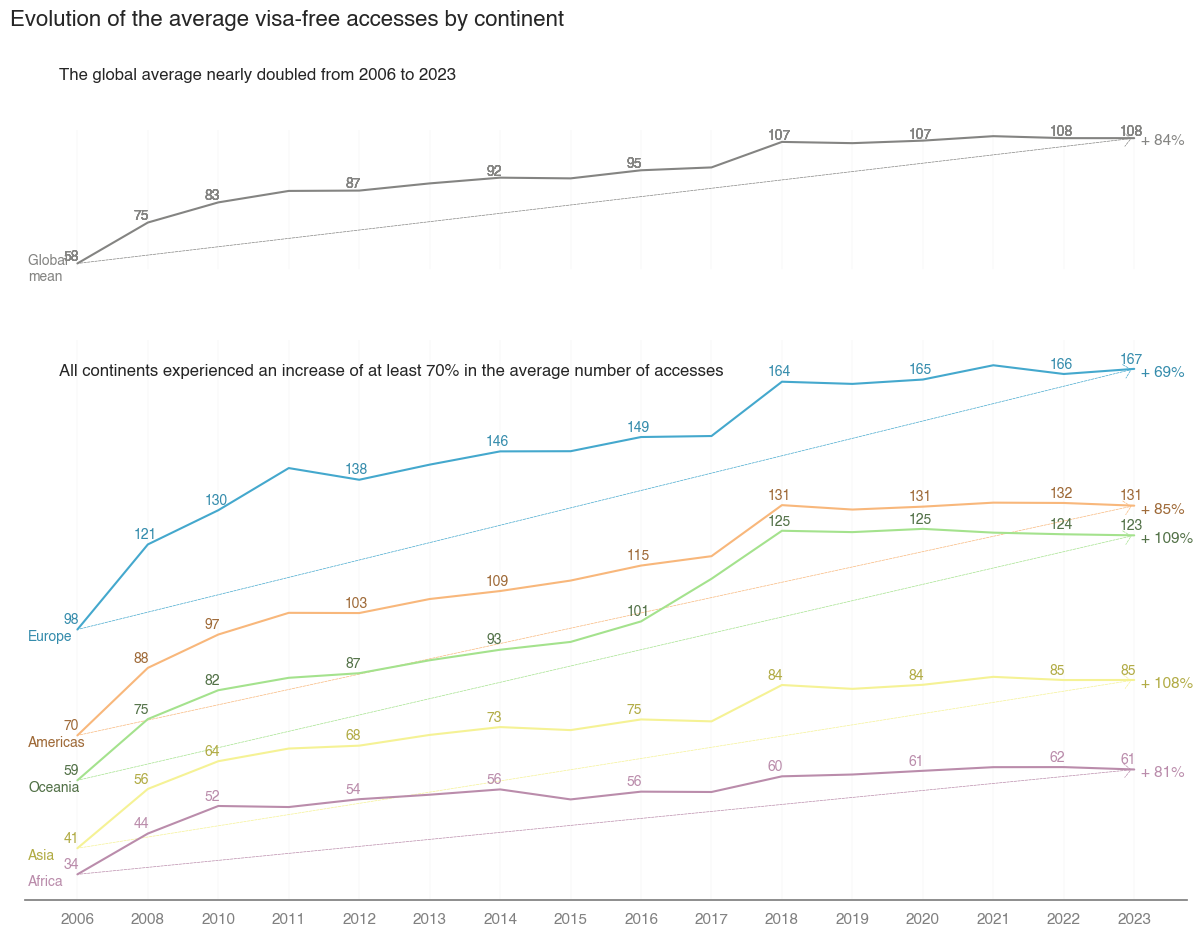

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(15,10), sharex=True, gridspec_kw={'height_ratios': [1, 4]})

#chart style
sns.set_style('whitegrid', {'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})

#chart title
plt.suptitle('Evolution of the average visa-free accesses by continent',fontsize=16, y=1, x=.3)

#plot average number of accesses by year by continent
f = sns.lineplot(ax=axes[1], data=df_passport, y='access', x='year_str', errorbar=None, hue='Continent', palette=colors_continent, estimator='mean')

#axis settings
f.set_xlabel('')
f.get_yaxis().set_visible(False)

f.tick_params(axis='x', colors='gray')
f.spines['bottom'].set_color('gray')

#plot average number of accesses by year
f1 = sns.lineplot(ax=axes[0], data=df_passport, y='access', x='year_str', errorbar=None, estimator='mean', color='#848482')

#axis settings
f1.get_yaxis().set_visible(False)
f1.spines['bottom'].set_color('white')

#annotation
total_mean_first_year = df_passport[df_passport['year'] == first_year]['access'].mean()
total_mean_last_year = df_passport[df_passport['year'] == last_year]['access'].mean()
growth_total_first_last = ((total_mean_last_year-total_mean_first_year)/total_mean_first_year)*100

f1.annotate('Global \nmean',
           size=10,  va="center", ha="left", xycoords='data', xy=(-0.7, total_mean_first_year-2), color='#848482',
           )
f1.annotate(f'+ {int(growth_total_first_last)}%',
           size=11,  va="center", ha="left", xycoords='data', xy=(15.1, total_mean_last_year-1), color='#848482',
           )
style_f1 = mpatches.ArrowStyle.CurveB(head_length=0.2)
arrow_f1 = mpatches.FancyArrowPatch((0, total_mean_first_year), (15, total_mean_last_year), mutation_scale=25, arrowstyle=style_f1, color='#848482', linestyle='--', linewidth=.5)
f1.add_patch(arrow_f1)

for continent in continents:
    continent_mean_last_year = df_passport[(df_passport['Continent']==continent) & (df_passport['year'] == last_year)]['access'].mean()
    continent_mean_first_year = df_passport[(df_passport['Continent']==continent) & (df_passport['year'] == first_year)]['access'].mean()
    growth_first_last = ((continent_mean_last_year-continent_mean_first_year)/continent_mean_first_year)*100

    style = mpatches.ArrowStyle.CurveB(head_length=0.2)
    arrow = mpatches.FancyArrowPatch((0, continent_mean_first_year), (15, continent_mean_last_year), mutation_scale=25, arrowstyle=style, color=colors_continent[continent], linestyle='--', linewidth=.5)
    f.add_patch(arrow)

    f.annotate(continent,
               size=10,  va="center", ha="left", xycoords='data', xy=(-0.7, continent_mean_first_year-2), color=colors_continent_text[continent],
               )

    f.annotate(f'+ {int(growth_first_last)}%',
               size=11,  va="center", ha="left", xycoords='data', xy=(15.1, continent_mean_last_year-1), color=colors_continent_text[continent],
               )

    for year in years:
        if year % 2 == 0 or year==2023:
            total_mean_year = df_passport[df_passport['year']==year]['access'].mean()
            continent_mean_year = df_passport[(df_passport['Continent']==continent) & (df_passport['year']==year)]['access'].mean()
            pos = sorted(years).index(year)
            f.annotate(int(continent_mean_year),
                       size=10,  va="center", ha="left", xycoords='data', xy=(pos-0.2, continent_mean_year+2.5), color=colors_continent_text[continent],
                       )
            f1.annotate(int(total_mean_year),
                       size=10,  va="center", ha="left", xycoords='data', xy=(pos-0.2, total_mean_year+2.5), color='#848482',
                       )

#remove legend
f.get_legend().remove()

#subtitle set
axes[0].set_title('The global average nearly doubled from 2006 to 2023',y=1.3, x=0.03, loc='left')
axes[1].set_title('All continents experienced an increase of at least 70% in the average number of accesses',y=0.92, x=0.03, loc='left')

#despine
sns.despine(left=True)

plt.show()

Inspired by: <https://www.visualcapitalist.com/cp/charted-the-worlds-aging-population-1950-to-2100/>

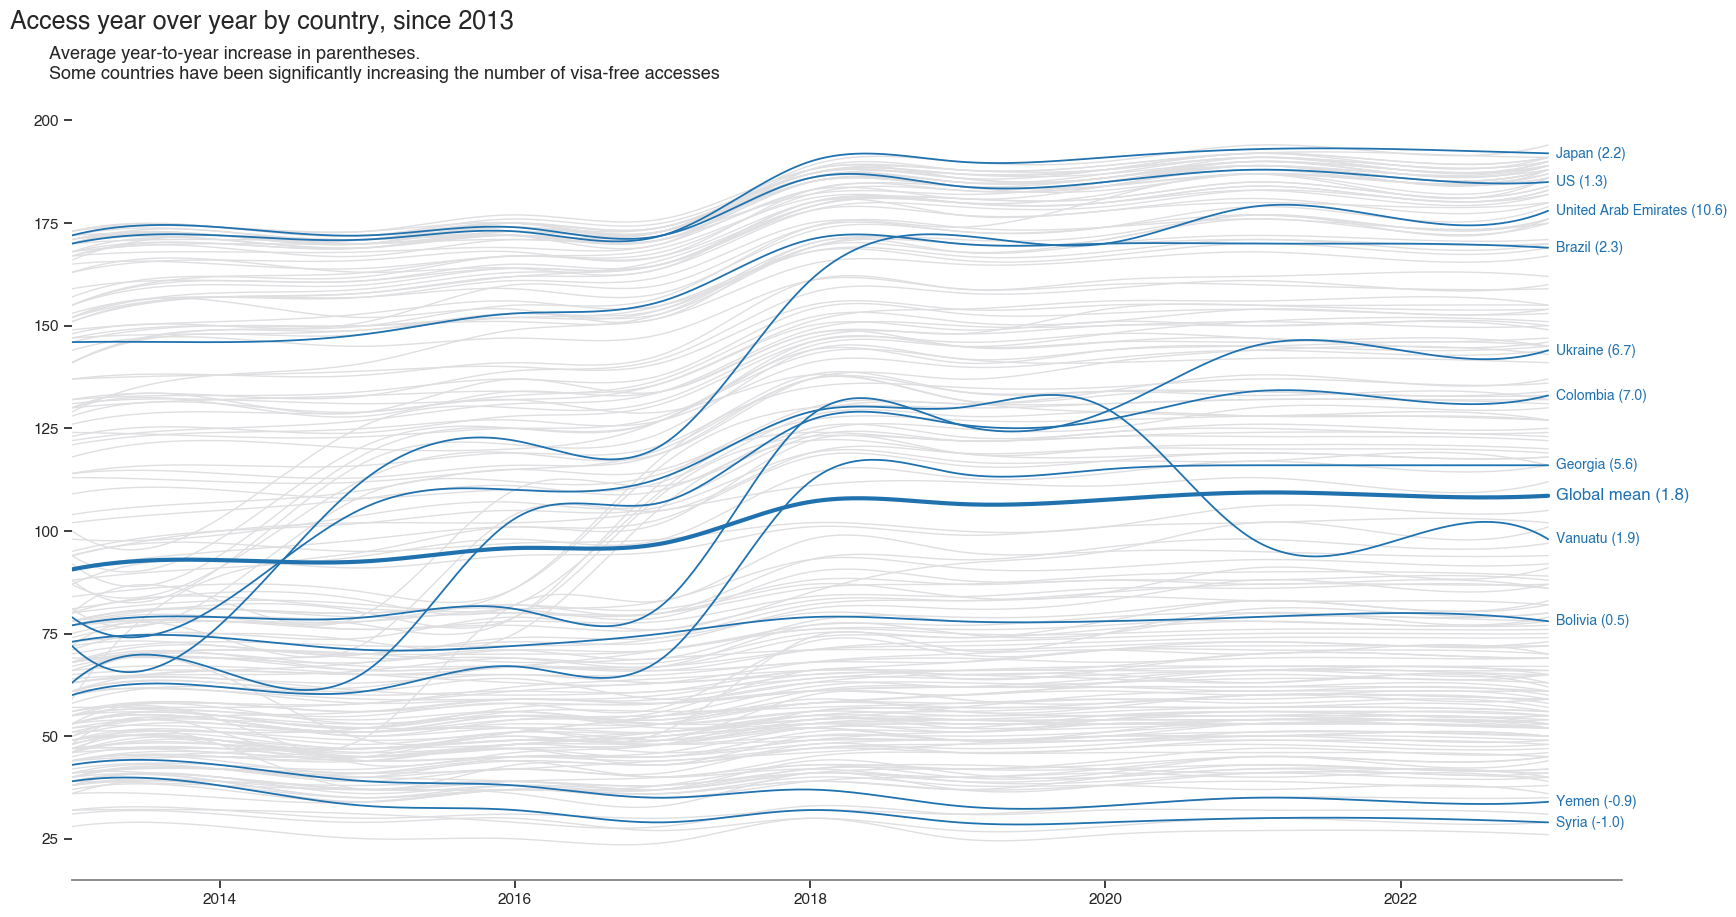

In [65]:
plt.figure(figsize=(20,10))

#Selected countries based on their behavior and YoY change in number of accesses
selected_countries = ('Brazil','Japan','US','Vanuatu','Ukraine','United Arab Emirates','Georgia','Yemen','Bolivia','Syria','Colombia')

#plot style
sns.set_style('ticks', {'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})

#set title
plt.suptitle('Access year over year by country, since 2013',fontsize=18, y=0.98, x=0.22)
plt.title('Average year-to-year increase in parentheses.\nSome countries have been significantly increasing the number of visa-free accesses',fontsize=13, y=1.03, x=-0.015, loc='left')

#for loop to plot each country
for c in countries:
    df_passport_country = df_passport[(df_passport['country']==c) & (df_passport['year']>=2013)].groupby('year_str').agg({'access':'mean'})
    df_passport_country.reset_index(inplace=True)

    #interpolation to smooth the curve
    X_Y_Spline_country = make_interp_spline(df_passport_country['year_str'], df_passport_country['access'])

    X = np.linspace(2013,2023,400)
    Y = X_Y_Spline_country(X)

    #define variables to highlight the selected countries
    color = '#2072AF' if c in selected_countries else '#DFDFE2'
    zorder = 5 if c in selected_countries else 0
    lw = 1.3 if c in selected_countries else 1

    #create lineplot
    f = sns.lineplot(x=X, y=Y, legend=None, color=color, zorder=zorder, lw=lw)

    #annotation of selected countries
    if c in selected_countries:
        pos_2023 = df_passport_country[df_passport_country['year_str']=='2023']['access']
        df_passport_country_diff = df_passport_country['access'].diff()
        diff_mean = df_passport_country_diff.mean()

        f.annotate(f'{c} ({diff_mean})',
                   size=10,  va="center", ha="left", xycoords='data', xy=(2023.05, pos_2023), color=color,
                   )

#same process of above applied to global mean
df_passport_mean = df_passport[df_passport['year']>=2013].groupby('year_str').agg({'access':'mean'})
df_passport_mean.reset_index(inplace=True)

X_Y_Spline_mean = make_interp_spline(df_passport_mean['year_str'], df_passport_mean['access'])

X_mean = np.linspace(2013,2023,400)
Y_mean = X_Y_Spline_mean(X_mean)

f1 = sns.lineplot(x=X_mean, y=Y_mean, legend=None, color='#2072AF', zorder=6, lw=3)

pos_2023_mean = df_passport_mean[df_passport_mean['year_str']=='2023']['access']
df_passport_mean_diff = df_passport_mean['access'].diff()
diff_mean_global = round(df_passport_mean_diff.mean(), 1)

f1.annotate(f'Global mean ({diff_mean_global})',
           size=12,  va="center", ha="left", xycoords='data', xy=(2023.05, pos_2023_mean), color='#2072AF',
           )

#x axis limit
plt.xlim(2013,2023.5)

#set spines settings
f.spines['bottom'].set_color('gray')
sns.despine(left=True)

plt.show()

#### Evolution of access by country

Normalization of regions, prioritizing sub-regions.

In [66]:
df_passport['region'] = np.where(df_passport['intermediate_region_name'].isna(), df_passport['sub_region_name'], df_passport['intermediate_region_name'])

##### Dataset creation

In [67]:
df_pivot = df_passport.pivot(index=['country','Continent','region'],columns='year',values='access')

df_pivot.reset_index(inplace=True)
df_lollipop = df_pivot[['country','Continent','region',2006,2008,2017,2018,2023]]

In [68]:
df_lollipop['min'] = df_lollipop.iloc[:,-5:].min(axis=1)
df_lollipop['max'] = df_lollipop.iloc[:,-5:].max(axis=1)

df_lollipop['pct_2006-2023'] = np.where(df_lollipop[2006].isna(), (df_lollipop[2023]/df_lollipop[2008])-1, (df_lollipop[2023]/df_lollipop[2006])-1)
df_lollipop['2006-2023'] = np.where(df_lollipop[2006].isna(), (df_lollipop[2023]-df_lollipop[2008]), (df_lollipop[2023]-df_lollipop[2006]))
df_lollipop['pct_2006-2023'] = np.where(df_lollipop[2008].isna(), (df_lollipop[2023]/df_lollipop[2017])-1, df_lollipop['pct_2006-2023'])
df_lollipop['2006-2023'] = np.where(df_lollipop[2008].isna(), (df_lollipop[2023]-df_lollipop[2017]), df_lollipop['2006-2023'])

df_lollipop['2006-2008'] = df_lollipop[2008]-df_lollipop[2006]
df_lollipop['2008-2017'] = df_lollipop[2017]-df_lollipop[2008]
df_lollipop['2017-2018'] = df_lollipop[2018]-df_lollipop[2017]
df_lollipop['2018-2023'] = df_lollipop[2023]-df_lollipop[2018]

C:\Users\alexm\AppData\Local\Temp\ipykernel_26344\1108593105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lollipop['min'] = df_lollipop.iloc[:,-5:].min(axis=1)
C:\Users\alexm\AppData\Local\Temp\ipykernel_26344\1108593105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lollipop['max'] = df_lollipop.iloc[:,-5:].max(axis=1)
C:\Users\alexm\AppData\Local\Temp\ipykernel_26344\1108593105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [69]:
#________ color dictionary for years __________
color_lollipop = {2006:'#CECE0A', 2008:'#D9911E', 2017:'#D61C4E', 2018:'#802858', 2023:'#293462'}

In [70]:
#________  function to find the indices of an element in a list __________
def find_index(list, item):
    return [index for index, element in enumerate(list) if element == item]

##### Oceania

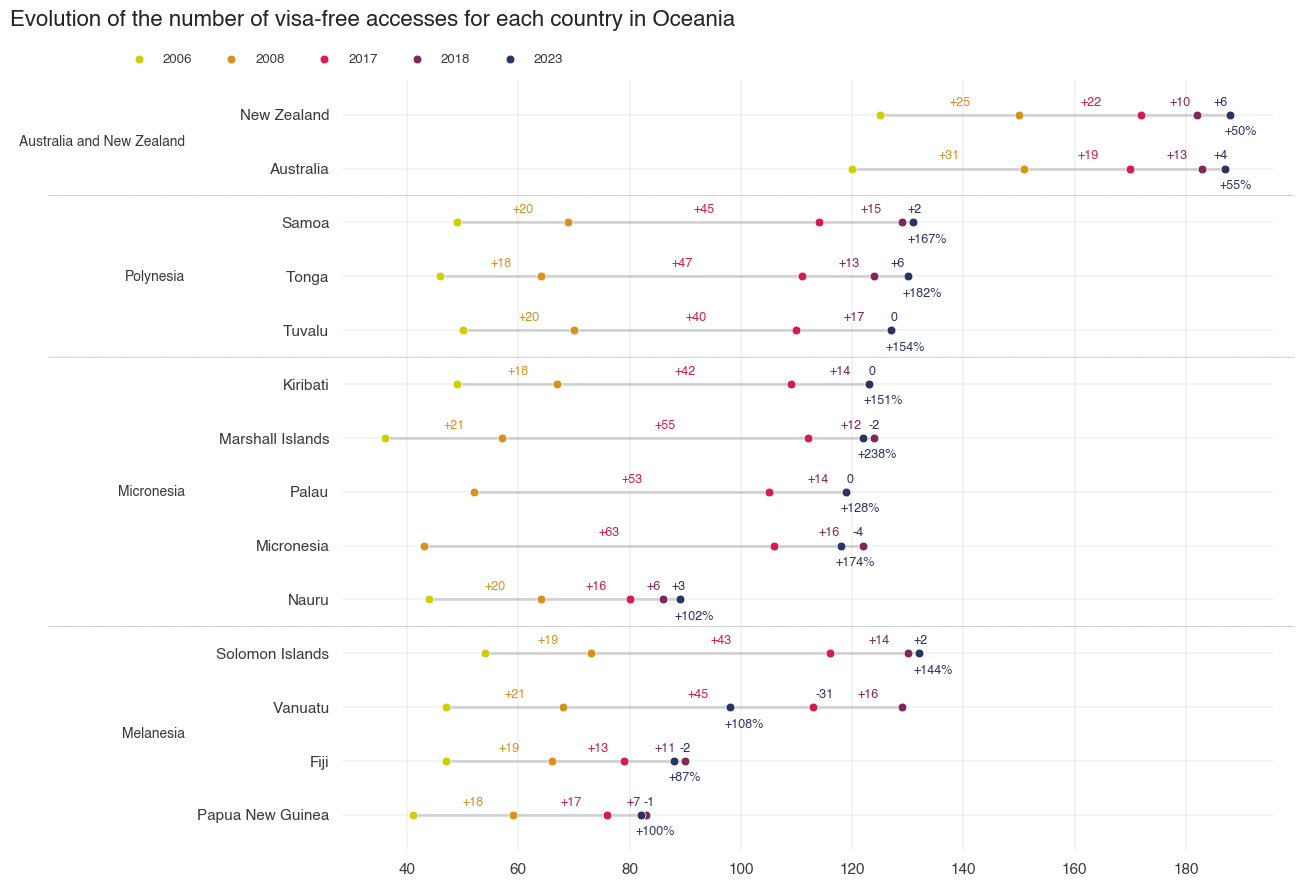

In [71]:
#________ definition of the continent and sorting by accesses of the last year and region's average __________
df_lollipop_agg = df_lollipop[df_lollipop['Continent'] == 'Oceania'].groupby('region').agg({2023: 'mean'})
df_lollipop_plot = df_lollipop[df_lollipop['Continent'] == 'Oceania']
df_lollipop_plot = df_lollipop_plot.merge(df_lollipop_agg, how='left', left_on='region', right_index=True, suffixes=(None,'_agg')).sort_values(['2023_agg',2023], ascending=False)

#________ definition of title, size and style of the plot __________
plt.figure(figsize=(12,10))
plt.suptitle('Evolution of the number of visa-free accesses for each country in Oceania',fontsize=16, y=.95, x=.15)

sns.set_style('whitegrid', {"grid.color": "gray" , 'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})
sns.set_context("notebook", rc={"grid.linewidth": 0.12})

#________ scatter plot __________
for year in df_lollipop_plot.iloc[:,3:8].columns:
    f = sns.scatterplot(data=df_lollipop_plot, x=year, y='country', s=40, color=color_lollipop[year])

#________ labels removal and change of colors __________
f.set_xlabel('')
f.set_ylabel('')
f.tick_params(axis='x', colors='#3B3C36')
f.tick_params(axis='y', colors='#3B3C36')

#________ creation of line between years __________
plt.hlines(df_lollipop_plot['country'], xmin=df_lollipop_plot['min'], xmax=df_lollipop_plot['max'], color='gray', alpha=0.3, lw=2, zorder=0)

#________ annotation __________
for iteration, c in enumerate(df_lollipop_plot['country'].unique()):
    growth = df_lollipop_plot[df_lollipop_plot['country']==c]['pct_2006-2023']
    access_2023 = df_lollipop_plot[df_lollipop_plot['country']==c][2023]
    #________ annotation of the variation from the first year with available data to the last year __________
    plt.annotate(f'+{int(growth*100)}%',
                 size=9,  va="center", ha="left", xycoords='data', xy=(access_2023-1, iteration+.32), color=color_lollipop[2023]
                 )
    #________ annotation of the increase/decrease of accesses between years __________
    for y in [(2006,2008),(2008,2017),(2017,2018),(2018,2023)]:
        diff = df_lollipop_plot[df_lollipop_plot['country']==c][f'{y[0]}-{y[1]}'].max()
        pos = (df_lollipop_plot[df_lollipop_plot['country']==c][y[0]]+df_lollipop_plot[df_lollipop_plot['country']==c][y[1]])/2
        sign = '+'
        if diff<=0: sign = ''

        if np.isnan(diff):
            pass
        else:
            plt.annotate(f'{sign}{int(diff)}',
                         size=9, va="center", ha="left", xycoords='data', xy=(pos, iteration-.23), color=color_lollipop[y[1]]
                         )

#________ legend creation __________
plt.legend(
    df_lollipop_plot.iloc[:,3:8].columns,
    frameon=False,
    bbox_to_anchor=(0.25, 1.05),
    ncol=5,
    fontsize=9.5,
    labelcolor="#3B3C36",
)

#________ region annotation __________
trans_x = f.get_xaxis_transform()
trans_y = f.get_yaxis_transform()

list_region = df_lollipop_plot['region'].tolist()
list_region_unique = df_lollipop_plot['region'].unique()

for region in list_region_unique:
    region_index = find_index(list_region, region)
    mean_region_index = np.average(region_index)
    plt.annotate(region, size=10, va="center", ha="right", xycoords=(trans_x,trans_y), xy=(0,mean_region_index), color='#3B3C36')

    max_index = np.max(region_index)
    if max_index != len(list_region)-1:
        plt.annotate('', xy=(-25, max_index+.5), xycoords=(trans_x,trans_y), xytext=(200, max_index+.5),
        arrowprops=dict(arrowstyle='-', linestyle=':', color='#3B3C36', linewidth=.3))

#________ margin removal __________
sns.despine(bottom=True, left=True)

plt.show()

##### Americas

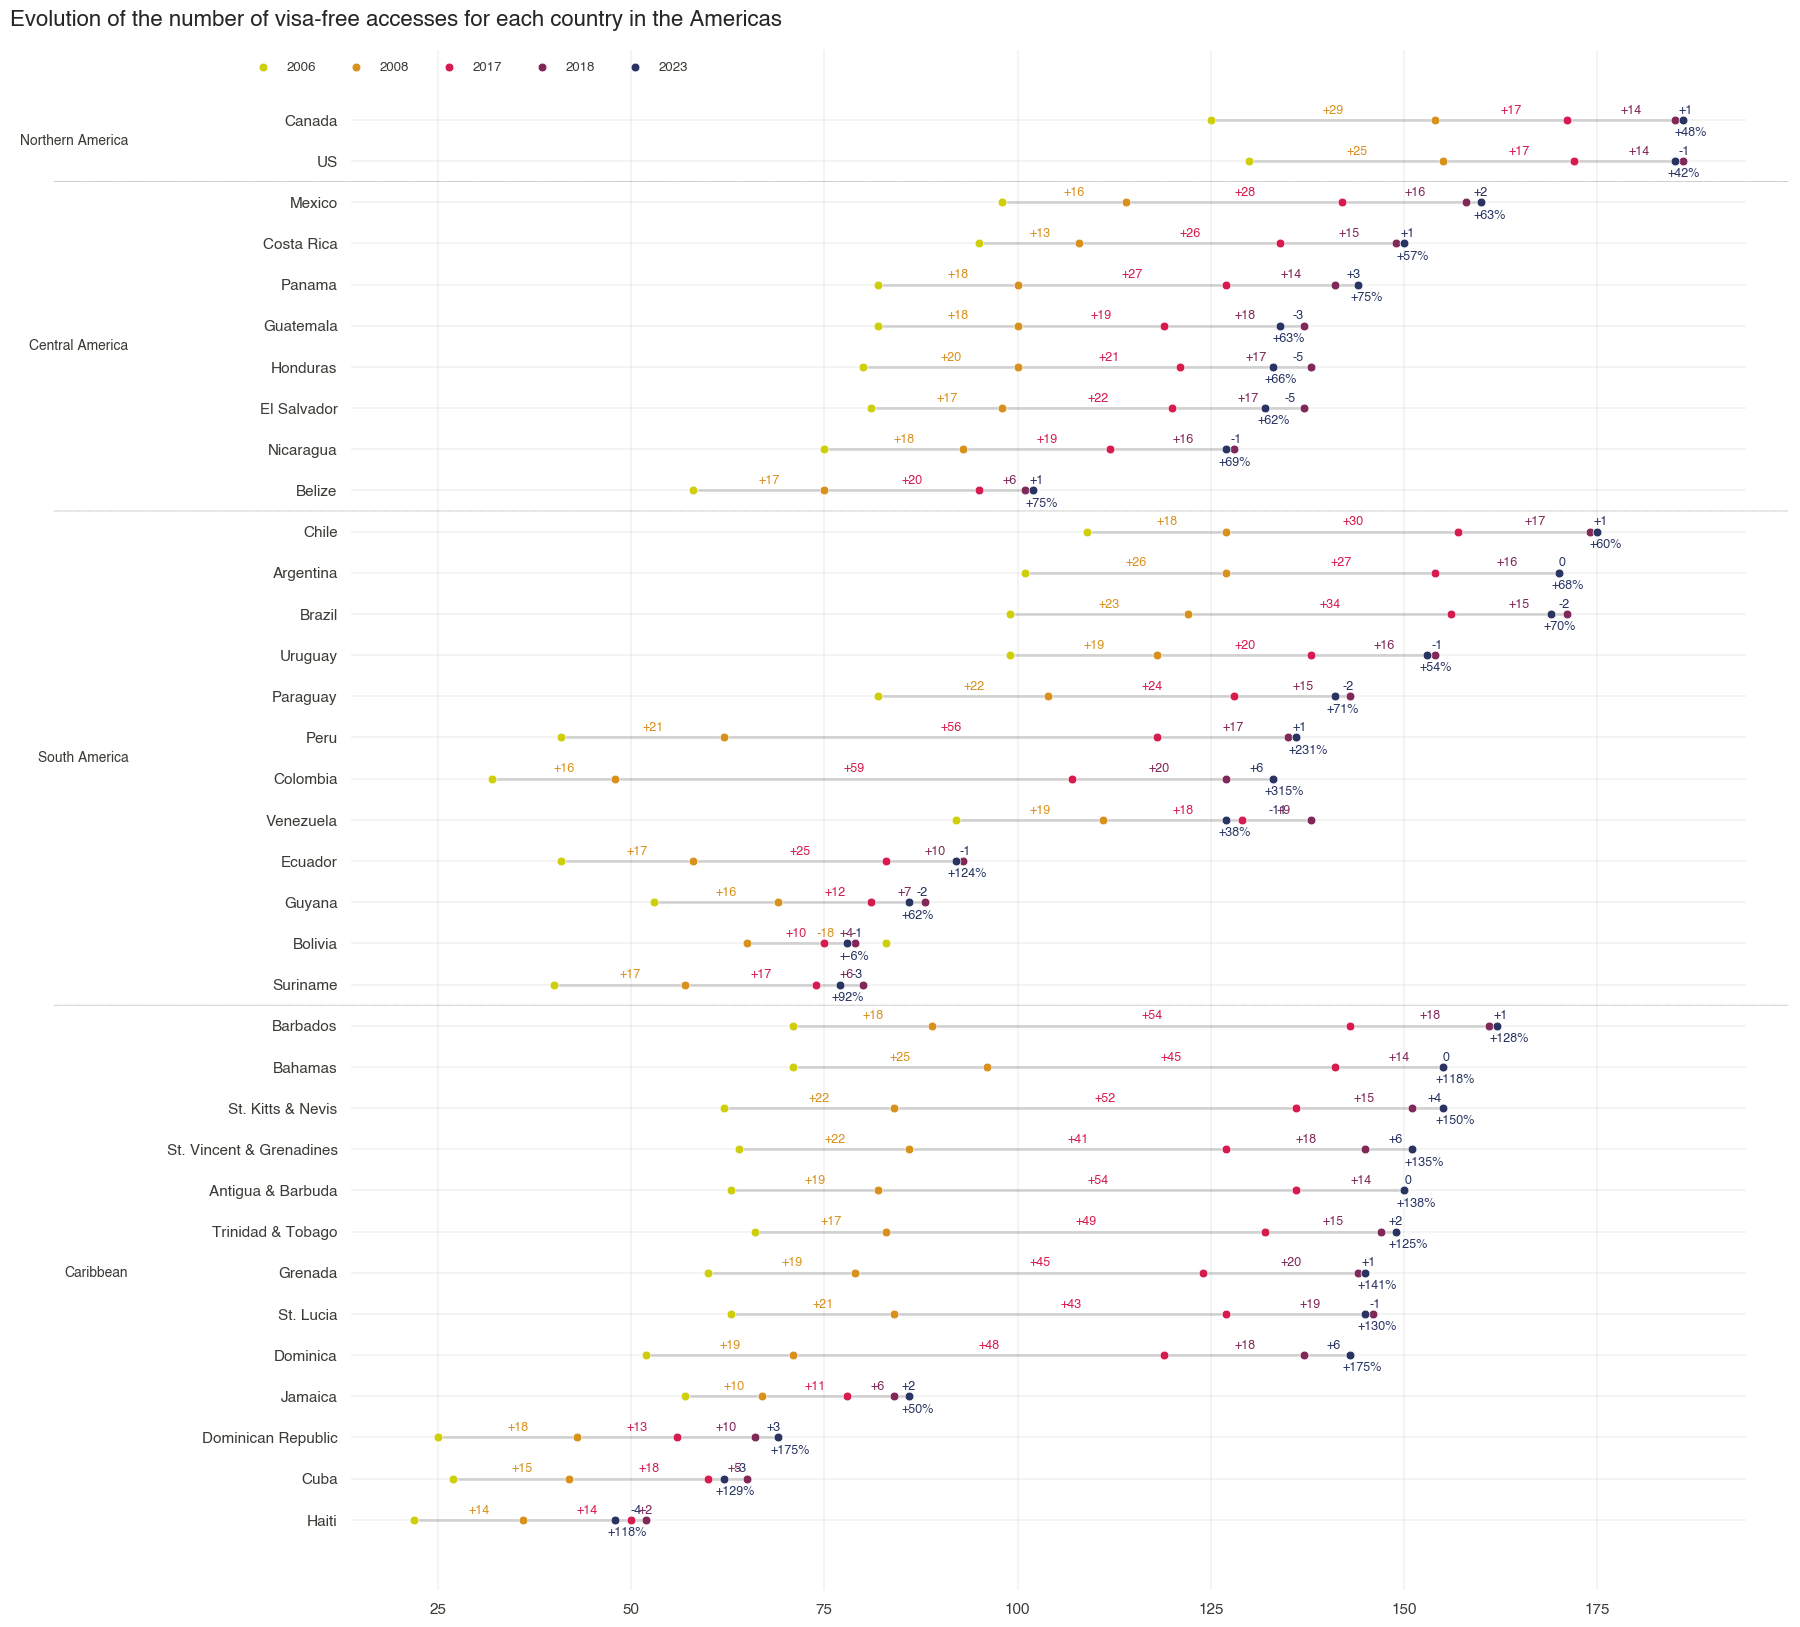

In [72]:
#________ definition of the continent and sorting by accesses of the last year and region's average __________
df_lollipop_continent = df_lollipop[df_lollipop['Continent'] == 'Americas']
df_lollipop_agg = df_lollipop_continent.groupby('region').agg({2023: 'mean'})
df_lollipop_plot = df_lollipop_continent.merge(df_lollipop_agg, how='left', left_on='region', right_index=True, suffixes=(None,'_agg')).sort_values(['2023_agg',2023], ascending=False)

#________ definition of title, size and style of the plot __________
plt.figure(figsize=(18,20))
plt.suptitle('Evolution of the number of visa-free accesses for each country in the Americas',fontsize=16, y=.9, x=.15)

sns.set_style('whitegrid', {"grid.color": "gray" , 'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})
sns.set_context("notebook", rc={"grid.linewidth": 0.12})

#________ scatter plot __________
for year in df_lollipop_plot.iloc[:,3:8].columns:
    f = sns.scatterplot(data=df_lollipop_plot, x=year, y='country', s=40, color=color_lollipop[year])

#________ labels removal and change of colors __________
f.set_xlabel('')
f.set_ylabel('')
f.tick_params(axis='x', colors='#3B3C36')
f.tick_params(axis='y', colors='#3B3C36')

#________ creation of line between years __________
plt.hlines(df_lollipop_plot['country'], xmin=df_lollipop_plot['min'], xmax=df_lollipop_plot['max'], color='gray', alpha=0.3, lw=2, zorder=0)

#________ annotation __________
for iteration, c in enumerate(df_lollipop_plot['country'].unique()):
    growth = df_lollipop_plot[df_lollipop_plot['country']==c]['pct_2006-2023']
    access_2023 = df_lollipop_plot[df_lollipop_plot['country']==c][2023]
    #________ annotation of the variation from the first year with available data to the last year __________
    plt.annotate(f'+{int(growth*100)}%',
                 size=9,  va="center", ha="left", xycoords='data', xy=(access_2023-1, iteration+.32), color=color_lollipop[2023]
                 )
    #________ annotation of the increase/decrease of accesses between years __________
    for y in [(2006,2008),(2008,2017),(2017,2018),(2018,2023)]:
        diff = df_lollipop_plot[df_lollipop_plot['country']==c][f'{y[0]}-{y[1]}'].max()
        pos = (df_lollipop_plot[df_lollipop_plot['country']==c][y[0]]+df_lollipop_plot[df_lollipop_plot['country']==c][y[1]])/2
        sign = '+'
        if diff<=0: sign = ''

        if np.isnan(diff):
            pass
        else:
            plt.annotate(f'{sign}{int(diff)}',
                         size=9, va="center", ha="left", xycoords='data', xy=(pos, iteration-.23), color=color_lollipop[y[1]]
                         )

#________ legend creation __________
plt.legend(
    df_lollipop_plot.iloc[:,3:8].columns,
    frameon=False,
    bbox_to_anchor=(0.25, 1),
    ncol=5,
    fontsize=9.5,
    labelcolor="#3B3C36",
)

#________ region annotation __________
trans_x = f.get_xaxis_transform()
trans_y = f.get_yaxis_transform()

list_region = df_lollipop_plot['region'].tolist()
list_region_unique = df_lollipop_plot['region'].unique()

for region in list_region_unique:
    region_index = find_index(list_region, region)
    mean_region_index = np.average(region_index)
    plt.annotate(region, size=10, va="center", ha="right", xycoords=(trans_x,trans_y), xy=(-15,mean_region_index), color='#3B3C36')

    max_index = np.max(region_index)
    if max_index != len(list_region)-1:
        plt.annotate('', xy=(-25, max_index+.5), xycoords=(trans_x,trans_y), xytext=(200, max_index+.5),
                     arrowprops=dict(arrowstyle='-', linestyle=':', color='#3B3C36', linewidth=.3))

#________ margin removal __________
sns.despine(bottom=True, left=True)

plt.show()

##### Europe

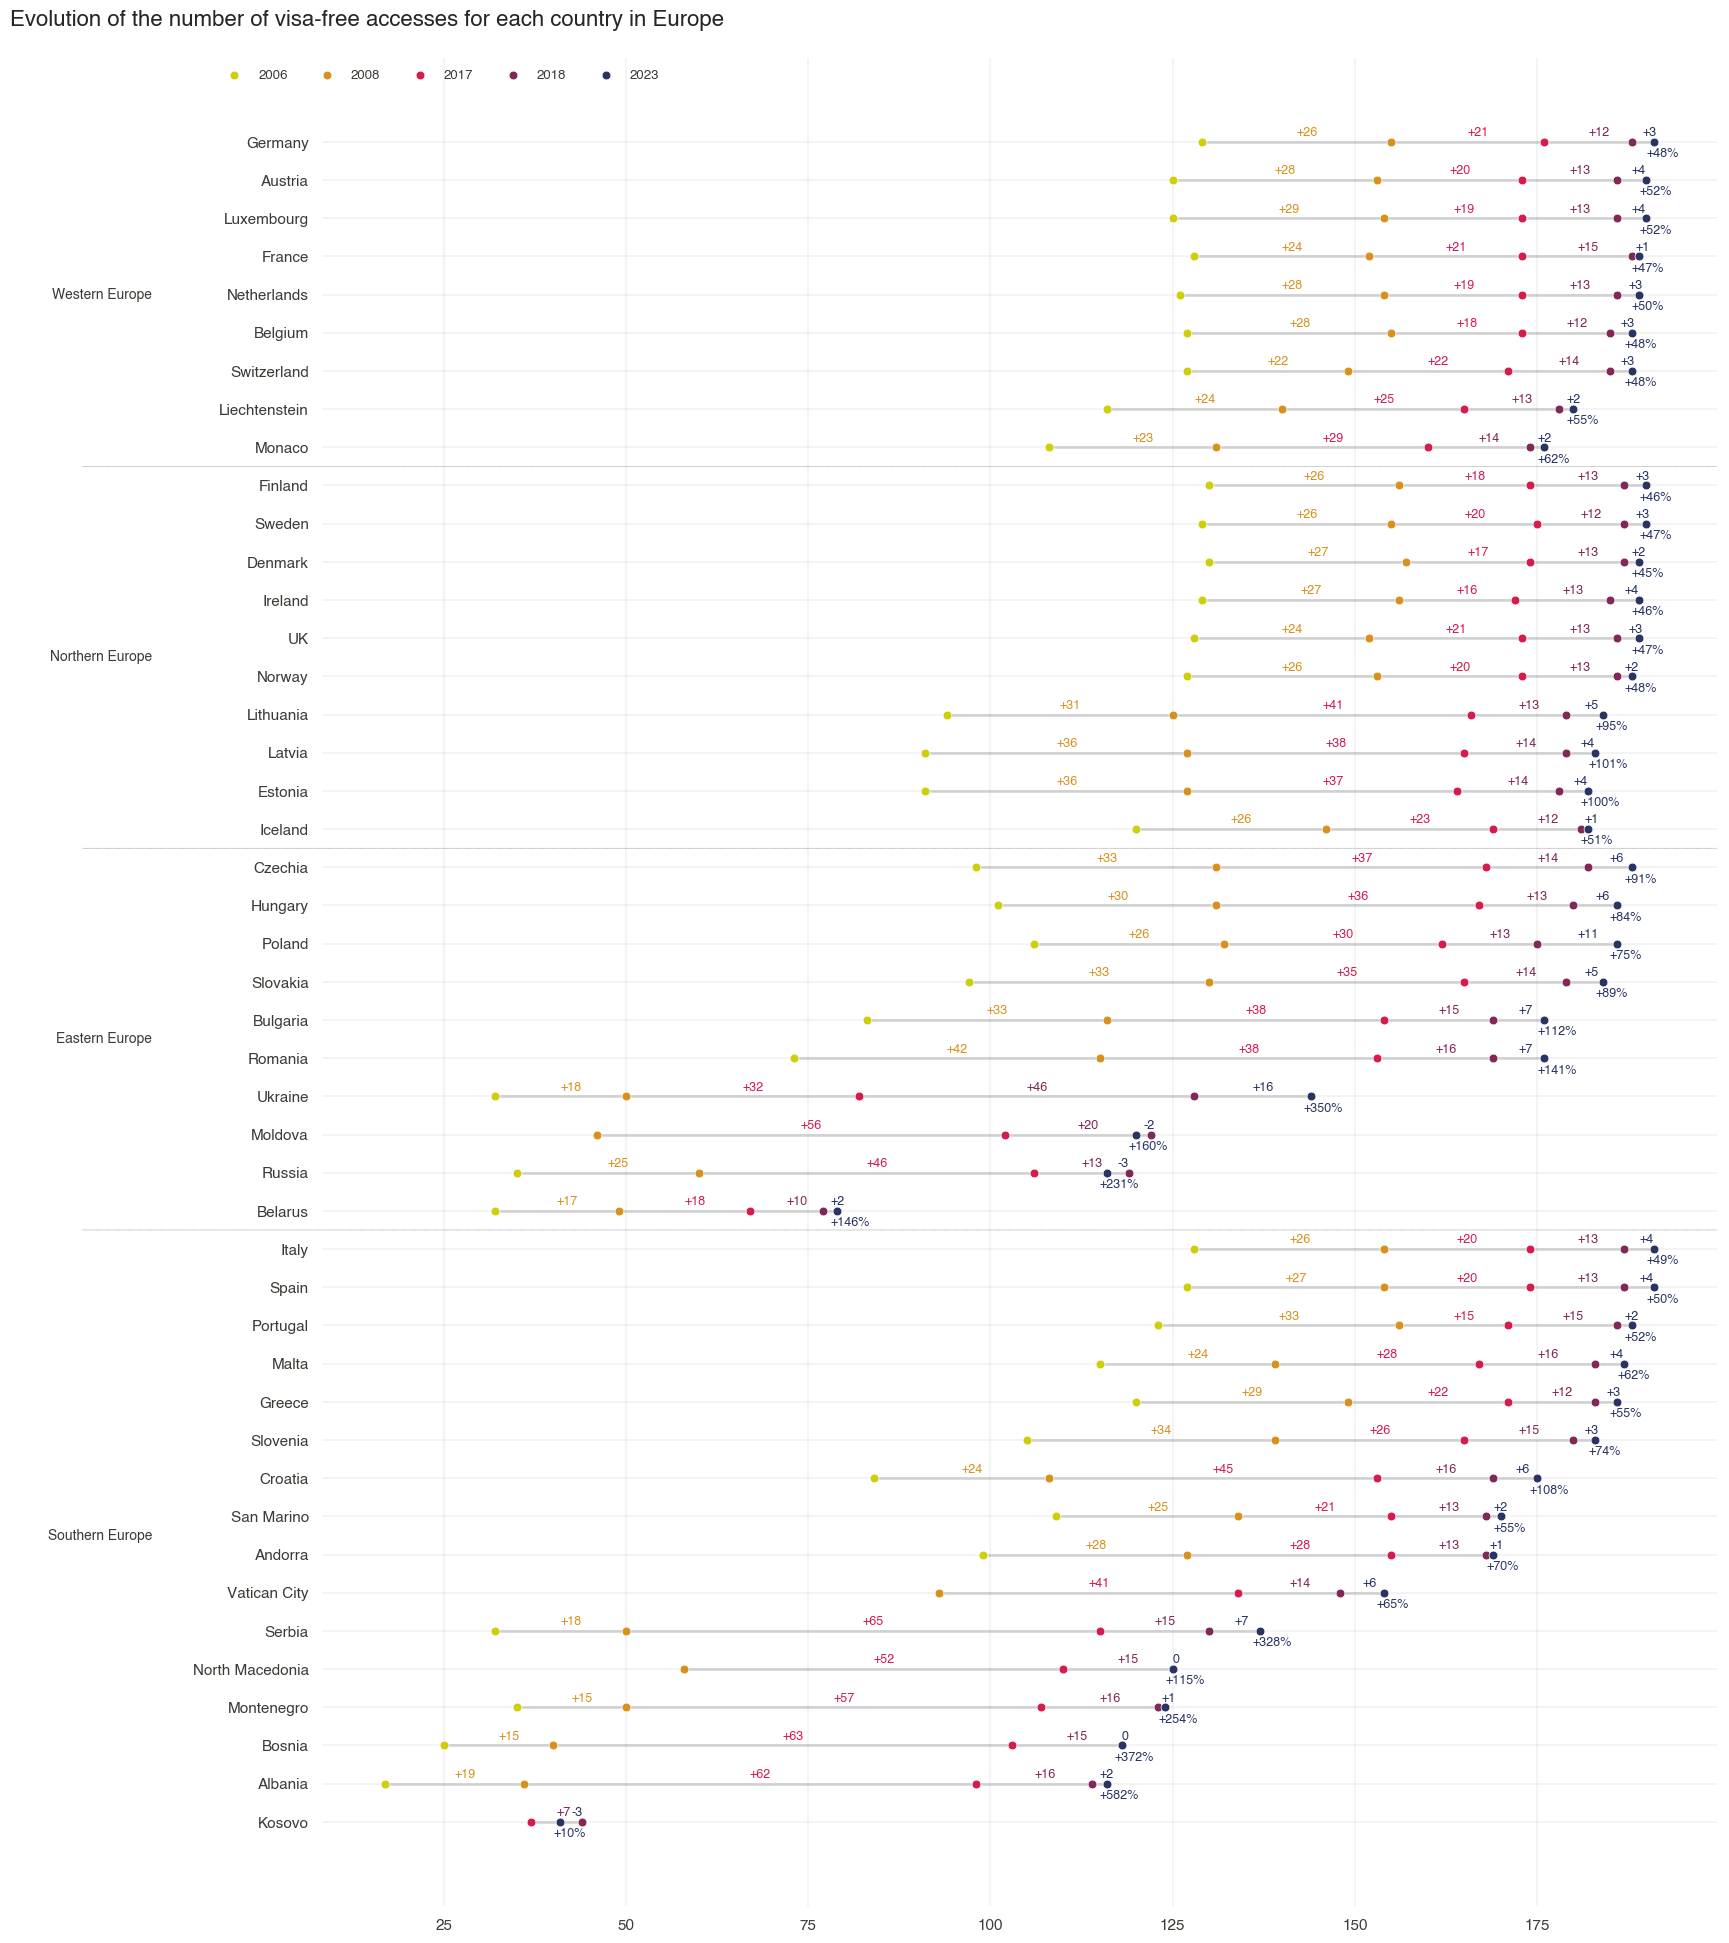

In [73]:
#________ definition of the continent and sorting by accesses of the last year and region's average __________
df_lollipop_continent = df_lollipop[df_lollipop['Continent'] == 'Europe']
df_lollipop_agg = df_lollipop_continent.groupby('region').agg({2023: 'mean'})
df_lollipop_plot = df_lollipop_continent.merge(df_lollipop_agg, how='left', left_on='region', right_index=True, suffixes=(None,'_agg')).sort_values(['2023_agg',2023], ascending=False)

#________ definition of title, size and style of the plot __________
plt.figure(figsize=(18,24))
plt.suptitle('Evolution of the number of visa-free accesses for each country in Europe',fontsize=16, y=.9, x=.15)

sns.set_style('whitegrid', {"grid.color": "gray" , 'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})
sns.set_context("notebook", rc={"grid.linewidth": 0.12})

#________ scatter plot __________
for year in df_lollipop_plot.iloc[:,3:8].columns:
    f = sns.scatterplot(data=df_lollipop_plot, x=year, y='country', s=40, color=color_lollipop[year])

#________ labels removal and change of colors __________
f.set_xlabel('')
f.set_ylabel('')
f.tick_params(axis='x', colors='#3B3C36')
f.tick_params(axis='y', colors='#3B3C36')

#________ creation of line between years __________
plt.hlines(df_lollipop_plot['country'], xmin=df_lollipop_plot['min'], xmax=df_lollipop_plot['max'], color='gray', alpha=0.3, lw=2, zorder=0)

#________ annotation __________
for iteration, c in enumerate(df_lollipop_plot['country'].unique()):
    growth = df_lollipop_plot[df_lollipop_plot['country']==c]['pct_2006-2023']
    access_2023 = df_lollipop_plot[df_lollipop_plot['country']==c][2023]
    #________ annotation of the variation from the first year with available data to the last year __________
    plt.annotate(f'+{int(growth*100)}%',
                 size=9,  va="center", ha="left", xycoords='data', xy=(access_2023-1, iteration+.32), color=color_lollipop[2023]
                 )
    #________ annotation of the increase/decrease of accesses between years __________
    for y in [(2006,2008),(2008,2017),(2017,2018),(2018,2023)]:
        diff = df_lollipop_plot[df_lollipop_plot['country']==c][f'{y[0]}-{y[1]}'].max()
        pos = (df_lollipop_plot[df_lollipop_plot['country']==c][y[0]]+df_lollipop_plot[df_lollipop_plot['country']==c][y[1]])/2
        sign = '+'
        if diff<=0: sign = ''

        if np.isnan(diff):
            pass
        else:
            plt.annotate(f'{sign}{int(diff)}',
                         size=9, va="center", ha="left", xycoords='data', xy=(pos, iteration-.23), color=color_lollipop[y[1]]
                         )

#________ legend creation __________
plt.legend(
    df_lollipop_plot.iloc[:,3:8].columns,
    frameon=False,
    bbox_to_anchor=(0.25, 1),
    ncol=5,
    fontsize=9.5,
    labelcolor="#3B3C36",
)

#________ region annotation __________
trans_x = f.get_xaxis_transform()
trans_y = f.get_yaxis_transform()

list_region = df_lollipop_plot['region'].tolist()
list_region_unique = df_lollipop_plot['region'].unique()

for region in list_region_unique:
    region_index = find_index(list_region, region)
    mean_region_index = np.average(region_index)
    plt.annotate(region, size=10, va="center", ha="right", xycoords=(trans_x,trans_y), xy=(-15,mean_region_index), color='#3B3C36')

    max_index = np.max(region_index)
    if max_index != len(list_region)-1:
        plt.annotate('', xy=(-25, max_index+.5), xycoords=(trans_x,trans_y), xytext=(200, max_index+.5),
                     arrowprops=dict(arrowstyle='-', linestyle=':', color='#3B3C36', linewidth=.3))

#________ margin removal __________
sns.despine(bottom=True, left=True)

plt.show()

##### Africa

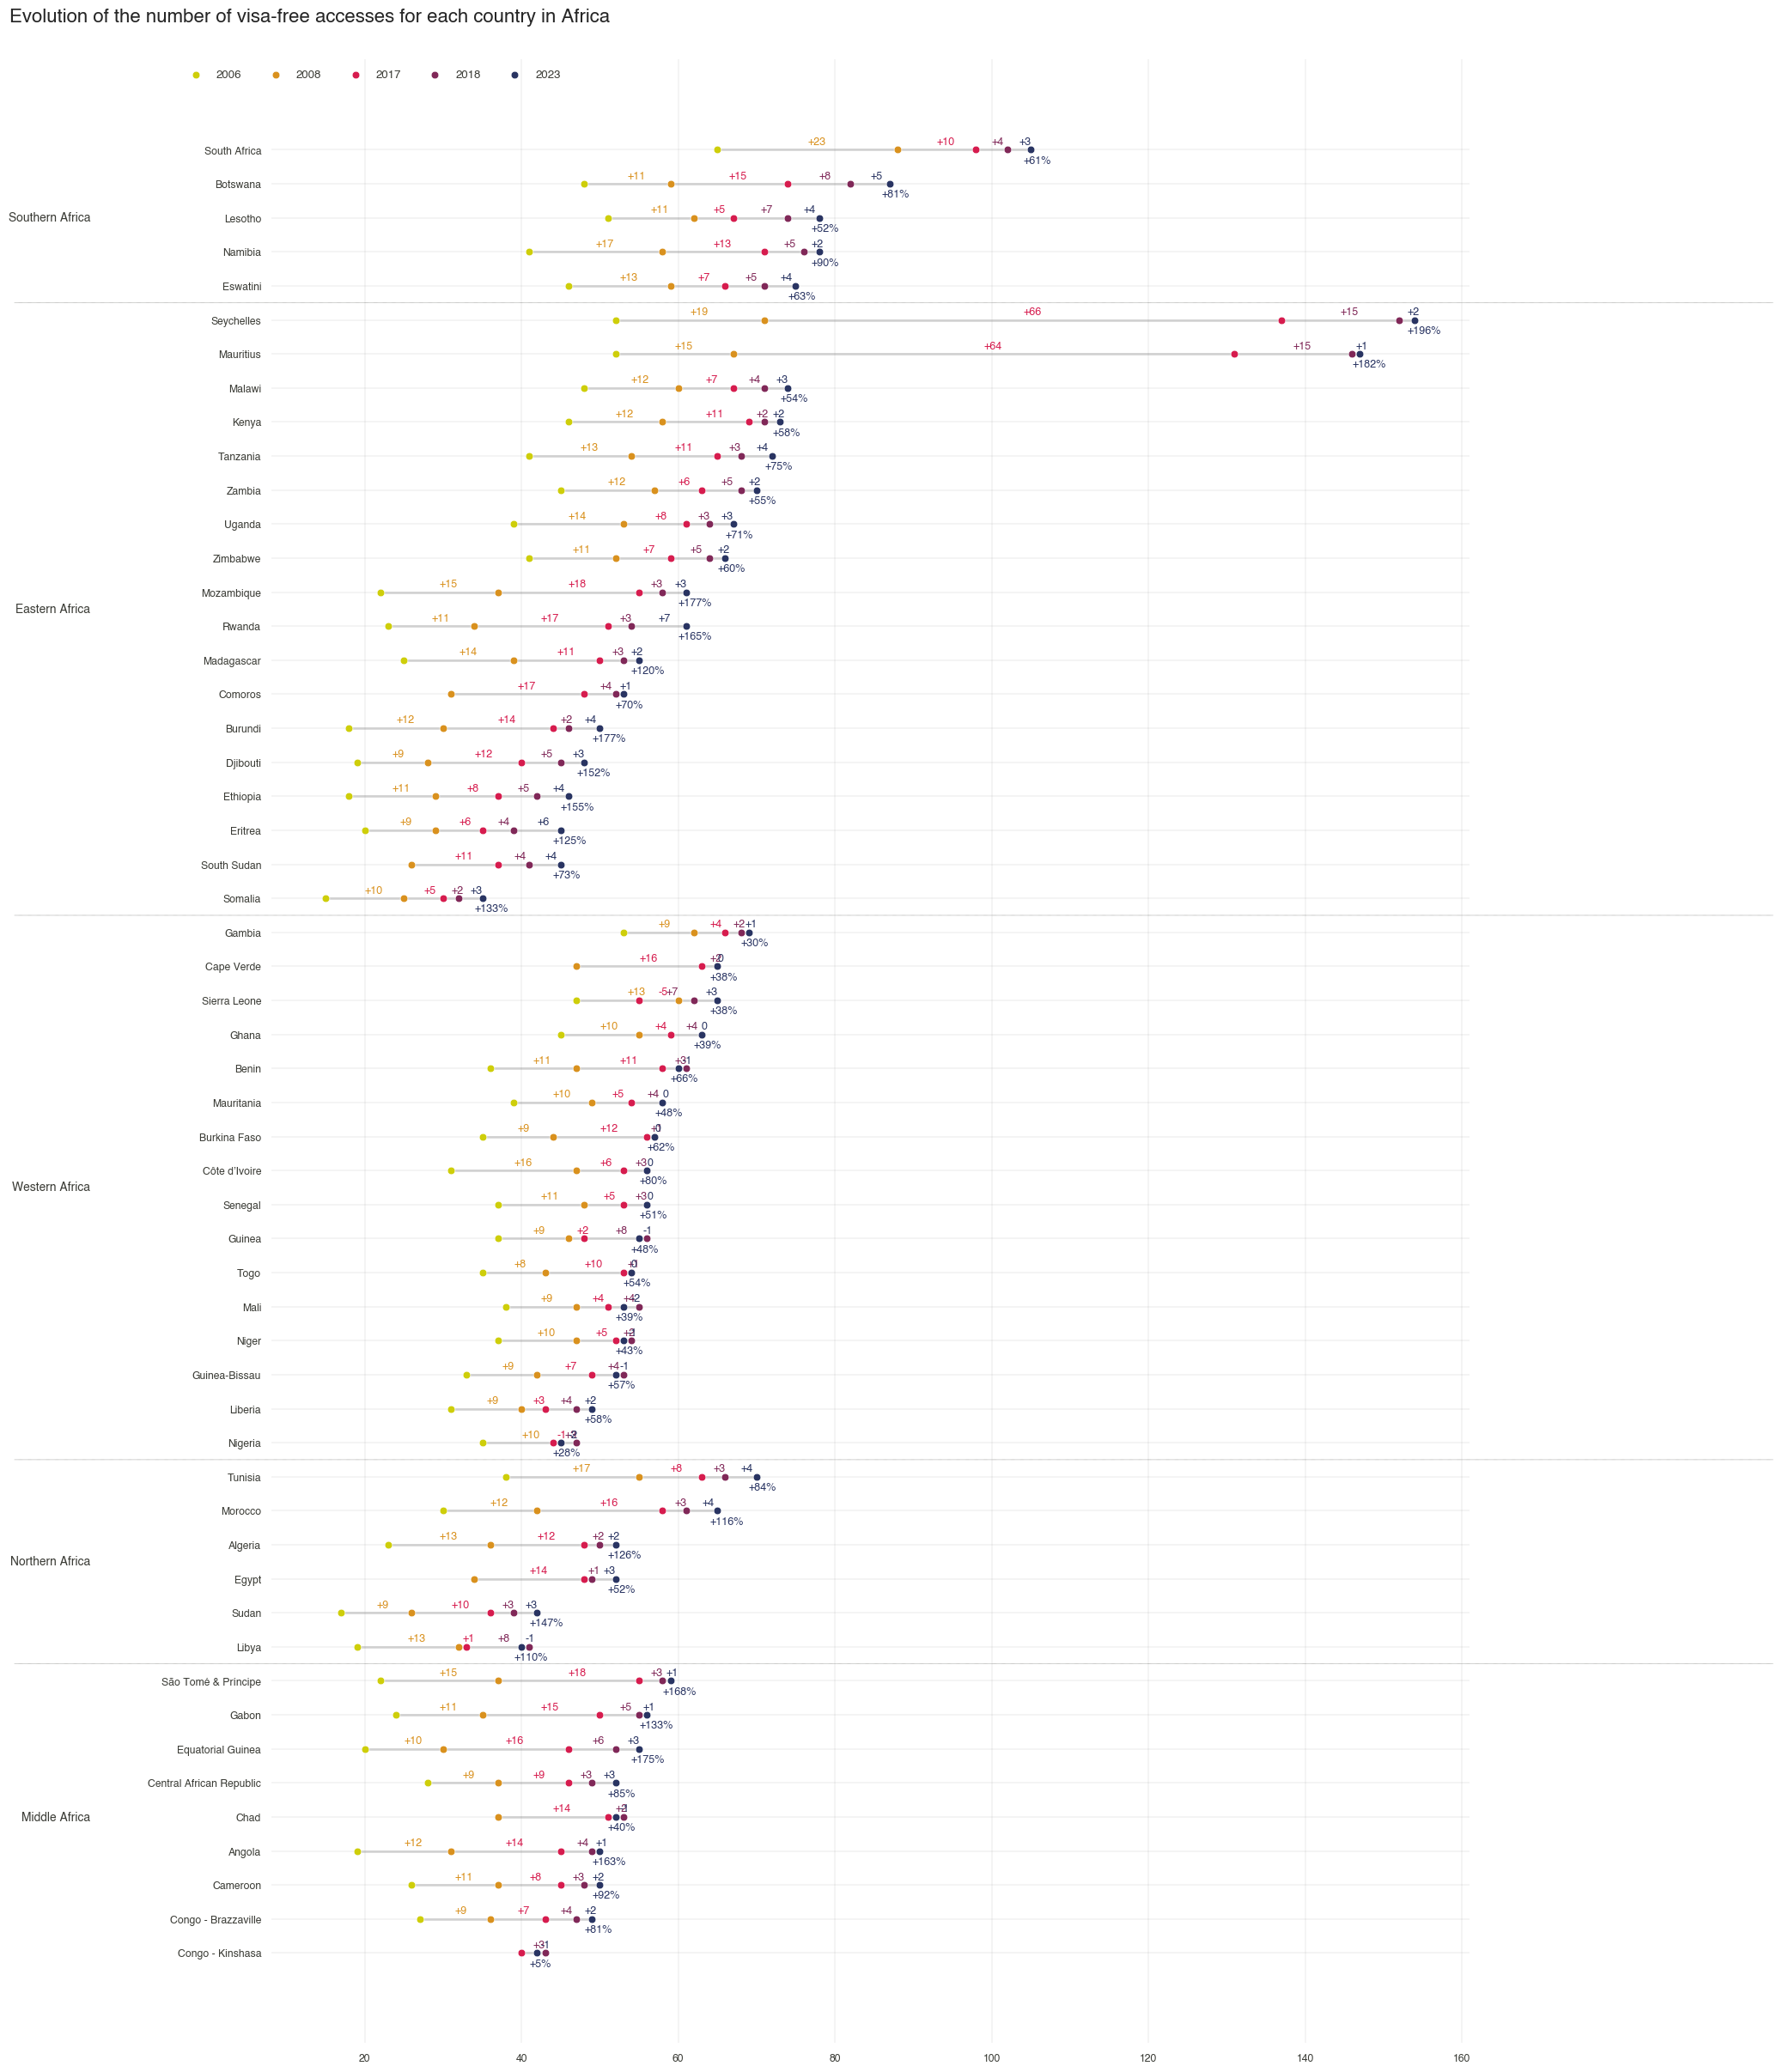

In [74]:
#________ definition of the continent and sorting by accesses of the last year and region's average __________
df_lollipop_continent = df_lollipop[df_lollipop['Continent'] == 'Africa']
df_lollipop_agg = df_lollipop_continent.groupby('region').agg({2023: 'mean'})
df_lollipop_plot = df_lollipop_continent.merge(df_lollipop_agg, how='left', left_on='region', right_index=True, suffixes=(None,'_agg')).sort_values(['2023_agg',2023], ascending=False)

#________ definition of title, size and style of the plot __________

saved = plt.figure(figsize=(18,30))
plt.suptitle('Evolution of the number of visa-free accesses for each country in Africa',fontsize=16, y=.9, x=.15)

sns.set_style('whitegrid', {"grid.color": "gray" , 'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})
sns.set_context("paper", rc={"grid.linewidth": 0.12})

#________ scatter plot __________
for year in df_lollipop_plot.iloc[:,3:8].columns:
    f = sns.scatterplot(data=df_lollipop_plot, x=year, y='country', s=40, color=color_lollipop[year])

#________ labels removal and change of colors __________
f.set_xlabel('')
f.set_ylabel('')
f.tick_params(axis='x', colors='#3B3C36')
f.tick_params(axis='y', colors='#3B3C36')

#________ creation of line between years __________
plt.hlines(df_lollipop_plot['country'], xmin=df_lollipop_plot['min'], xmax=df_lollipop_plot['max'], color='gray', alpha=0.3, lw=2, zorder=0)

#________ annotation __________
for iteration, c in enumerate(df_lollipop_plot['country'].unique()):
    growth = df_lollipop_plot[df_lollipop_plot['country']==c]['pct_2006-2023']
    access_2023 = df_lollipop_plot[df_lollipop_plot['country']==c][2023]
    #________ annotation of the variation from the first year with available data to the last year __________
    plt.annotate(f'+{int(growth*100)}%',
                 size=9,  va="center", ha="left", xycoords='data', xy=(access_2023-1, iteration+.32), color=color_lollipop[2023]
                 )
    #________ annotation of the increase/decrease of accesses between years __________
    for y in [(2006,2008),(2008,2017),(2017,2018),(2018,2023)]:
        diff = df_lollipop_plot[df_lollipop_plot['country']==c][f'{y[0]}-{y[1]}'].max()
        pos = (df_lollipop_plot[df_lollipop_plot['country']==c][y[0]]+df_lollipop_plot[df_lollipop_plot['country']==c][y[1]])/2
        sign = '+'
        if diff<=0: sign = ''

        if np.isnan(diff):
            pass
        else:
            plt.annotate(f'{sign}{int(diff)}',
                         size=9, va="center", ha="left", xycoords='data', xy=(pos, iteration-.23), color=color_lollipop[y[1]]
                         )

#________ legend creation __________
plt.legend(
    df_lollipop_plot.iloc[:,3:8].columns,
    frameon=False,
    bbox_to_anchor=(0.25, 1),
    ncol=5,
    fontsize=9.5,
    labelcolor="#3B3C36",
)

#________ region annotation __________
trans_x = f.get_xaxis_transform()
trans_y = f.get_yaxis_transform()

list_region = df_lollipop_plot['region'].tolist()
list_region_unique = df_lollipop_plot['region'].unique()

for region in list_region_unique:
    region_index = find_index(list_region, region)
    mean_region_index = np.average(region_index)
    plt.annotate(region, size=10, va="center", ha="right", xycoords=(trans_x,trans_y), xy=(-15,mean_region_index), color='#3B3C36')

    max_index = np.max(region_index)
    if max_index != len(list_region)-1:
        plt.annotate('', xy=(-25, max_index+.5), xycoords=(trans_x,trans_y), xytext=(200, max_index+.5),
                     arrowprops=dict(arrowstyle='-', linestyle=':', color='#3B3C36', linewidth=.3))

#________ margin removal __________
sns.despine(bottom=True, left=True)

plt.show()

##### Asia

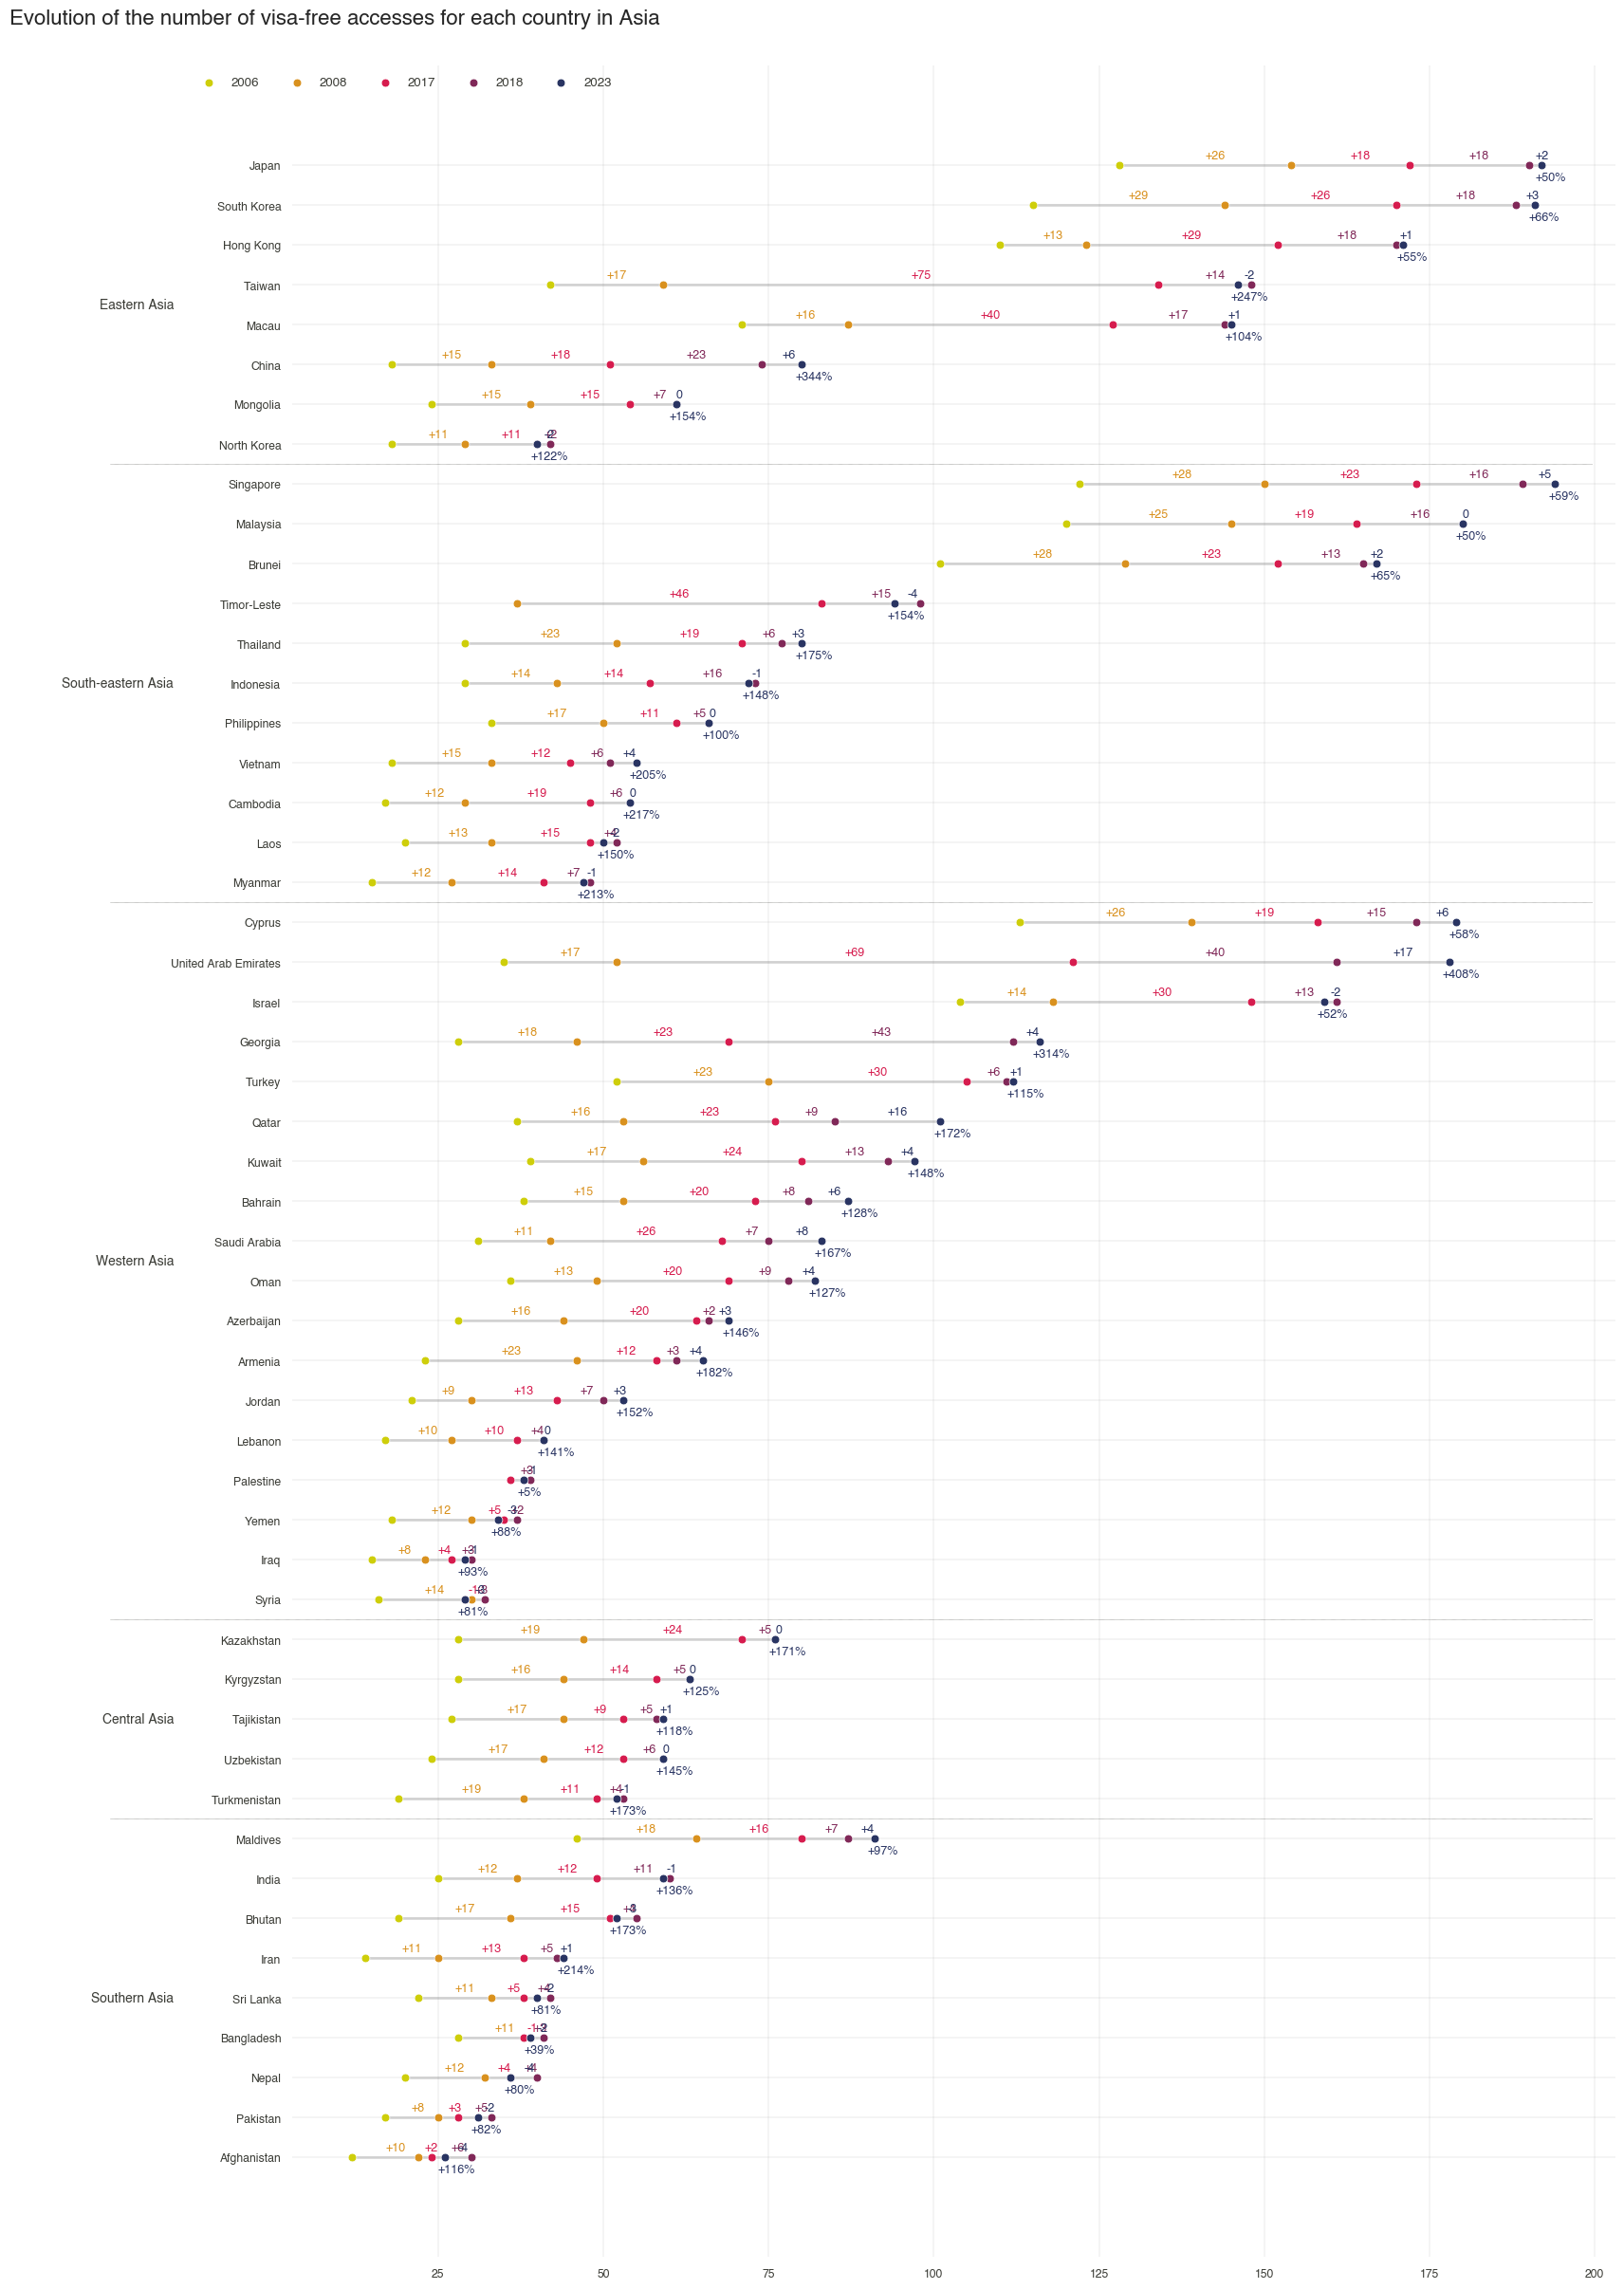

In [75]:
#________ definition of the continent and sorting by accesses of the last year and region's average __________
df_lollipop_continent = df_lollipop[df_lollipop['Continent'] == 'Asia']
df_lollipop_agg = df_lollipop_continent.groupby('region').agg({2023: 'mean'})
df_lollipop_plot = df_lollipop_continent.merge(df_lollipop_agg, how='left', left_on='region', right_index=True, suffixes=(None,'_agg')).sort_values(['2023_agg',2023], ascending=False)

#________ definition of title, size and style of the plot __________

saved = plt.figure(figsize=(18,30))
plt.suptitle('Evolution of the number of visa-free accesses for each country in Asia',fontsize=16, y=.9, x=.15)

sns.set_style('whitegrid', {"grid.color": "gray" , 'font_family':'sans-serif', 'font.sans-serif':'Helvetica'})
sns.set_context("paper", rc={"grid.linewidth": 0.12})

#________ scatter plot __________
for year in df_lollipop_plot.iloc[:,3:8].columns:
    f = sns.scatterplot(data=df_lollipop_plot, x=year, y='country', s=40, color=color_lollipop[year])

#________ labels removal and change of colors __________
f.set_xlabel('')
f.set_ylabel('')
f.tick_params(axis='x', colors='#3B3C36')
f.tick_params(axis='y', colors='#3B3C36')

#________ creation of line between years __________
plt.hlines(df_lollipop_plot['country'], xmin=df_lollipop_plot['min'], xmax=df_lollipop_plot['max'], color='gray', alpha=0.3, lw=2, zorder=0)

#________ annotation __________
for iteration, c in enumerate(df_lollipop_plot['country'].unique()):
    growth = df_lollipop_plot[df_lollipop_plot['country']==c]['pct_2006-2023']
    access_2023 = df_lollipop_plot[df_lollipop_plot['country']==c][2023]
    #________ annotation of the variation from the first year with available data to the last year __________
    plt.annotate(f'+{int(growth*100)}%',
                 size=9,  va="center", ha="left", xycoords='data', xy=(access_2023-1, iteration+.32), color=color_lollipop[2023]
                 )
    #________ annotation of the increase/decrease of accesses between years __________
    for y in [(2006,2008),(2008,2017),(2017,2018),(2018,2023)]:
        diff = df_lollipop_plot[df_lollipop_plot['country']==c][f'{y[0]}-{y[1]}'].max()
        pos = (df_lollipop_plot[df_lollipop_plot['country']==c][y[0]]+df_lollipop_plot[df_lollipop_plot['country']==c][y[1]])/2
        sign = '+'
        if diff<=0: sign = ''

        if np.isnan(diff):
            pass
        else:
            plt.annotate(f'{sign}{int(diff)}',
                         size=9, va="center", ha="left", xycoords='data', xy=(pos, iteration-.23), color=color_lollipop[y[1]]
                         )

#________ legend creation __________
plt.legend(
    df_lollipop_plot.iloc[:,3:8].columns,
    frameon=False,
    bbox_to_anchor=(0.25, 1),
    ncol=5,
    fontsize=9.5,
    labelcolor="#3B3C36",
)

#________ region annotation __________
trans_x = f.get_xaxis_transform()
trans_y = f.get_yaxis_transform()

list_region = df_lollipop_plot['region'].tolist()
list_region_unique = df_lollipop_plot['region'].unique()

for region in list_region_unique:
    region_index = find_index(list_region, region)
    mean_region_index = np.average(region_index)
    plt.annotate(region, size=10, va="center", ha="right", xycoords=(trans_x,trans_y), xy=(-15,mean_region_index), color='#3B3C36')

    max_index = np.max(region_index)
    if max_index != len(list_region)-1:
        plt.annotate('', xy=(-25, max_index+.5), xycoords=(trans_x,trans_y), xytext=(200, max_index+.5),
                     arrowprops=dict(arrowstyle='-', linestyle=':', color='#3B3C36', linewidth=.3))

#________ margin removal __________
sns.despine(bottom=True, left=True)

plt.show()